#PROBLEM STATEMENT

###BUSINESS OVERVIEW
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
For many incumbent operators, retaining high profitable customers is the number one business goal.

#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Steps-

1. Reading and understanding data
2. EDA
3. Data preparation
4. Building the model
5. Model Evaluation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Apply formatting to floats
pd.options.display.float_format = '{:20,.2f}'.format
np.random.seed(0)

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
churn = pd.read_csv("telecom_churn_data.csv")
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26494 entries, 0 to 26493
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(212), int64(2), object(12)
memory usage: 45.7+ MB


In [ ]:
churn.shape

(26494, 226)

In [ ]:
#find data type of each column and number of non null values in each columns
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26494 entries, 0 to 26493
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             26494 non-null  int64  
 1    circle_id                 26494 non-null  int64  
 2    loc_og_t2o_mou            26228 non-null  float64
 3    std_og_t2o_mou            26228 non-null  float64
 4    loc_ic_t2o_mou            26228 non-null  float64
 5    last_date_of_month_6      26494 non-null  object 
 6    last_date_of_month_7      26320 non-null  object 
 7    last_date_of_month_8      26188 non-null  object 
 8    last_date_of_month_9      26037 non-null  object 
 9    arpu_6                    26494 non-null  float64
 10   arpu_7                    26494 non-null  float64
 11   arpu_8                    26494 non-null  float64
 12   arpu_9                    26494 non-null  float64
 13   onnet_mou_6               25473 non-null  fl

In [ ]:
#percentage of null values in each column
round(100*(churn.isnull().sum()/len(churn.index)),2)

mobile_number                    0.00
circle_id                        0.00
loc_og_t2o_mou                   1.00
std_og_t2o_mou                   1.00
loc_ic_t2o_mou                   1.00
                         ...         
aon                              0.00
aug_vbc_3g                       0.00
jul_vbc_3g                       0.00
jun_vbc_3g                       0.00
sep_vbc_3g                       0.00
Length: 226, dtype: float64

In [ ]:
#Lets understand the distribution of numeric columns
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"26,494.00","26,494.00","26,228.00","26,228.00","26,228.00","26,494.00","26,494.00","26,494.00","26,494.00","25,473.00",...,"26,493.00","6,747.00","6,775.00","7,003.00","6,885.00","26,493.00","26,493.00","26,493.00","26,493.00","26,493.00"
mean,"7,001,204,852.65",109.00,0.00,0.00,0.00,283.68,276.84,277.12,260.20,132.09,...,0.09,0.91,0.91,0.89,0.86,"1,221.86",66.12,63.83,58.39,3.35
std,"695,612.97",0.00,0.00,0.00,0.00,309.82,301.65,308.92,298.28,295.34,...,0.72,0.28,0.29,0.31,0.35,955.26,247.77,254.29,241.73,32.42
min,"7,000,000,126.00",109.00,0.00,0.00,0.00,"-2,041.23","-2,014.05",-945.81,-380.82,0.00,...,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,"7,000,603,240.25",109.00,0.00,0.00,0.00,94.45,88.08,83.41,62.84,7.53,...,0.00,1.00,1.00,1.00,1.00,468.00,0.00,0.00,0.00,0.00
50%,"7,001,198,551.00",109.00,0.00,0.00,0.00,198.97,191.61,191.02,178.65,34.86,...,0.00,1.00,1.00,1.00,1.00,866.00,0.00,0.00,0.00,0.00
75%,"7,001,810,472.50",109.00,0.00,0.00,0.00,373.02,365.20,369.51,354.70,119.93,...,0.00,1.00,1.00,1.00,1.00,"1,818.00",0.00,0.00,0.00,0.00
max,"7,002,410,816.00",109.00,0.00,0.00,0.00,"9,394.54","6,453.69","8,989.68","5,412.55","6,504.34",...,49.00,1.00,1.00,1.00,1.00,"4,337.00","5,738.74","5,486.80","7,080.38","1,941.60"


In [ ]:
#no. of unique values in each column
churn.nunique()

mobile_number     26494
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3252
aug_vbc_3g         4246
jul_vbc_3g         4092
jun_vbc_3g         3898
sep_vbc_3g         1253
Length: 226, dtype: int64

__Summary:__
1. There are total 99999 rows and 226 columns in churn.
2. There are some columns having greater than 70% null values.
3. Also, there are some columns having only one or two unique value.
4. mobile number is unique in all the records.
6. Also, there are outliers in some columns. We need to analyse these columns further.
7. There are columns having NAN & only one unique value.

In [ ]:
#Drop the columns where all entries are na
filtered_data = churn.dropna(axis=1, how='all')
print("Number of columns after dropping columns with all NAs: ", len(filtered_data.columns))

Number of columns after dropping columns with all NAs:  226


Filling NAs with 0 for the respective column

In [ ]:
filtered_data['total_rech_data_6']=filtered_data['total_rech_data_6'].fillna(0)
filtered_data['total_rech_data_7']=filtered_data['total_rech_data_7'].fillna(0)
filtered_data['total_rech_data_8']=filtered_data['total_rech_data_8'].fillna(0)
filtered_data['total_rech_data_9']=filtered_data['total_rech_data_9'].fillna(0)

In [ ]:
filtered_data['date_of_last_rech_data_6']=filtered_data['date_of_last_rech_data_6'].fillna(0)
filtered_data['date_of_last_rech_data_7']=filtered_data['date_of_last_rech_data_7'].fillna(0)
filtered_data['date_of_last_rech_data_8']=filtered_data['date_of_last_rech_data_8'].fillna(0)
filtered_data['date_of_last_rech_data_9']=filtered_data['date_of_last_rech_data_9'].fillna(0)

In [ ]:
filtered_data['max_rech_data_6']=filtered_data['max_rech_data_6'].fillna(0)
filtered_data['max_rech_data_7']=filtered_data['max_rech_data_7'].fillna(0)
filtered_data['max_rech_data_8']=filtered_data['max_rech_data_8'].fillna(0)
filtered_data['max_rech_data_9']=filtered_data['max_rech_data_9'].fillna(0)

In [ ]:
filtered_data['av_rech_amt_data_6']=filtered_data['av_rech_amt_data_6'].fillna(0)
filtered_data['av_rech_amt_data_7']=filtered_data['av_rech_amt_data_7'].fillna(0)
filtered_data['av_rech_amt_data_8']=filtered_data['av_rech_amt_data_8'].fillna(0)
filtered_data['av_rech_amt_data_9']=filtered_data['av_rech_amt_data_9'].fillna(0)

In [ ]:
filtered_data['total_rech_data_amt_6'] = filtered_data['av_rech_amt_data_6'] * filtered_data['total_rech_data_6']

filtered_data['total_rech_data_amt_7'] = filtered_data['av_rech_amt_data_7'] * filtered_data['total_rech_data_7']

filtered_data['total_rech_data_amt_8'] = filtered_data['av_rech_amt_data_8'] * filtered_data['total_rech_data_8']

filtered_data['total_rech_data_amt_9'] = filtered_data['av_rech_amt_data_9'] * filtered_data['total_rech_data_9']

In [ ]:
filtered_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

In [ ]:
avg_rech_6n7 = (filtered_data['total_rech_amt_6'].fillna(0)
+ filtered_data['total_rech_amt_7'].fillna(0)
+ filtered_data['total_rech_data_amt_6'].fillna(0)
+ filtered_data['total_rech_data_amt_7'].fillna(0))/2

Lets take 70th percentile

In [ ]:
perc_70_6n7 = np.percentile(avg_rech_6n7, 70.0)
print("70 percentile is : ", perc_70_6n7)

70 percentile is :  478.5


In [ ]:
filtered_data = filtered_data[avg_rech_6n7 >= perc_70_6n7]
print("Dimension of filtered data set", filtered_data.shape)

Dimension of filtered data set (7952, 222)


#### 1.3.3 Tag churners
- Tag churners and remove attributes of the churn phase.
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase


- The attributes to be used for tagging churners are:

    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [ ]:
#Check if any of the columns used to calculate churn have null values
for column in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    if filtered_data[column].isnull().any():
           print('{0}: {1}'.format(column, filtered_data[column].isnull().sum()))

In [ ]:
filtered_data['last_month_usage']=filtered_data['total_ic_mou_9']+filtered_data['total_og_mou_9']+filtered_data['vol_2g_mb_9']+filtered_data['vol_3g_mb_9']
filtered_data['churn'] = np.where(filtered_data['last_month_usage']>0, 0, 1)

In [ ]:
#Drop columns used for churn
filtered_data=filtered_data.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','last_month_usage'], axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  219


In [ ]:
#Drop other columns for last month(9/September)
last_mnth_cols = [x for x in filtered_data.columns if "9" in x or "sep" in x]
filtered_data = filtered_data.drop(last_mnth_cols,axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  169


Create Dummy variables

In [ ]:
filtered_data.nunique().sort_values(ascending=True)

std_og_t2c_mou_6       1
circle_id              1
loc_og_t2o_mou         1
std_og_t2o_mou         1
loc_ic_t2o_mou         1
                    ... 
total_og_mou_7      7122
arpu_8              7581
arpu_6              7821
arpu_7              7829
mobile_number       7952
Length: 169, dtype: int64

#### These are the Categorical Variables which have only two counts 0 and 1.
1. _night_pck_user_6
2. _night_pck_user_7
3. _night_pck_user_8
4. _night_pck_user_9
5. _fb_user_6
6. _fb_user_7
7. _fb_user_8
8. _fb_user_9

In [ ]:
print(filtered_data['night_pck_user_6'].value_counts())
print(filtered_data['night_pck_user_7'].value_counts())
print(filtered_data['night_pck_user_8'].value_counts())
print(filtered_data['fb_user_6'].value_counts())
print(filtered_data['fb_user_7'].value_counts())
print(filtered_data['fb_user_8'].value_counts())

0.00    4406
1.00      94
Name: night_pck_user_6, dtype: int64
0.00    4434
1.00      90
Name: night_pck_user_7, dtype: int64
0.00    4180
1.00      80
Name: night_pck_user_8, dtype: int64
1.00    4161
0.00     339
Name: fb_user_6, dtype: int64
1.00    4165
0.00     359
Name: fb_user_7, dtype: int64
1.00    3806
0.00     454
Name: fb_user_8, dtype: int64


In [ ]:
def create_dummy(feature,filtered_df):
    dummy = pd.get_dummies(filtered_df[feature], prefix=feature,drop_first = True)
    # Add the results to the original filtered_df dataframe
    filtered_df[feature] = dummy
    return filtered_df

In [ ]:
categorical_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
for col in categorical_cols:
  filtered_data = create_dummy(col, filtered_data)

Data cleaning

Drop the columns with only 1 distinct value

In [ ]:
#Drop the columns with only 1 distinct value
filtered_data = filtered_data.loc[:,filtered_data.apply(pd.Series.nunique) != 1]
print("Number of columns after dropping columns with only 1 distinct value: ", len(filtered_data.columns))

Number of columns after dropping columns with only 1 distinct value:  156


In [ ]:
#drop all the columns with greater than 60% of NA values
filtered_data = filtered_data.dropna(thresh=int(filtered_data.shape[0]*.60), axis=1)
print("Number of columns after dropping columns with > 60% NAs: ", len(filtered_data.columns))

Number of columns after dropping columns with > 60% NAs:  144


In [ ]:
filtered_data.describe(include = 'all')

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
count,"7,952.00","7,952.00","7,952.00","7,952.00","7,821.00","7,828.00","7,674.00","7,821.00","7,828.00","7,674.00",...,"7,952.00","7,952.00","7,952.00","7,952.00","7,952.00","7,952.00","7,952.00","7,952.00","7,952.00","7,952.00"
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"7,001,211,987.31",557.48,553.29,502.26,263.00,270.89,243.50,381.03,383.11,346.04,...,0.52,0.48,"1,214.17",161.73,167.96,150.63,459.83,498.88,465.05,0.08
std,"693,607.56",416.55,397.63,418.57,457.25,491.48,473.93,479.36,497.89,469.89,...,0.50,0.50,957.38,386.14,409.24,391.19,"1,365.33","1,267.04","1,893.30",0.27
min,"7,000,000,256.00","-2,041.23","-2,014.05",-945.81,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"7,000,609,916.50",308.92,311.04,234.07,20.33,19.04,14.63,78.81,78.33,56.49,...,0.00,0.00,460.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"7,001,216,041.50",480.10,480.18,427.60,89.73,85.87,73.11,233.48,229.97,196.32,...,1.00,0.00,859.00,0.00,0.00,0.00,98.00,100.00,25.00,0.00
75%,"7,001,816,029.25",698.91,690.65,656.96,295.56,289.66,253.40,499.11,496.08,446.39,...,1.00,1.00,"1,788.25",119.95,129.78,98.65,423.00,545.25,345.00,0.00


Remove rows with null values

In [ ]:
#Rows with all values null
filtered_data.isnull().all(axis=1).sum()
print("Number of rows after dropping NAs: ", filtered_data.shape[0])

Number of rows after dropping NAs:  7952


In [ ]:
# Count of rows with misisng values count in them
missing_values_in_rows = [x for x in filtered_data.isnull().sum(axis=1) if x>0]
np.unique(missing_values_in_rows, return_counts=True)

(array([ 1,  2, 27, 28, 29, 54, 55, 56, 81, 82, 83]),
 array([ 92,   3, 190,  64,   3,  41,  11,   5,  47,   6,   1]))

As seen above, there are many rows with missing values, few with 1 or 2 missing values and many with >=27 missing values. Drop all the rows with many missing values.

In [ ]:
#Drop these rows
filtered_data = filtered_data[filtered_data.isnull().sum(axis=1) <= 2]
print("Number of rows: ", filtered_data.shape[0])

Number of rows:  7584


Fix date columns

In [ ]:
date_cols = [x for x in filtered_data.columns if "date" in x ]
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [ ]:
filtered_data = filtered_data.drop(date_cols, axis=1)

Imput missing values

Fetch columns with null values

In [ ]:
c = round(100*(filtered_data.isnull().sum()/len(filtered_data.index)), 2)
c[c > 0]

Series([], dtype: float64)

Outlier treatment

In [ ]:
print("Number of rows before outlier treatment: ", filtered_data.shape[0])

Number of rows before outlier treatment:  7584


In [ ]:
categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','churn', 'week_of_last_rech_6', 'week_of_last_rech_7', 'week_of_last_rech_8']
numerical=[col for col in filtered_data if col not in categorical]

In [ ]:
def removeOutliers(filtered_data, cols):
    for col in cols:
        Q1 = filtered_data[col].quantile(0.25)
        Q3 = filtered_data[col].quantile(0.99)
        IQR = Q3 - Q1
        filtered_data = filtered_data[((filtered_data[col] >= (Q1 - 1.5 * IQR)) &(filtered_data[col]<= (Q3 + 1.5 * IQR)))]
    return filtered_data

In [ ]:
filtered_data = removeOutliers(filtered_data, numerical)

In [ ]:
print("Number of rows after outlier treatment: ", filtered_data.shape[0])


Number of rows after outlier treatment:  6807


# EDA exploratory Data Analysis

Checking class imbalance

In [ ]:
#Counting churn and non-churn numbers to check class balance
non_churn=filtered_data['churn'].value_counts()[0]
churn=filtered_data['churn'].value_counts()[1]
churn_percentage=(churn*100)/(churn+non_churn)
print('Churn percentage is:',churn_percentage)


Churn percentage is: 5.523725576612311


In [ ]:
churn_df=filtered_data.loc[filtered_data['churn']==1]
non_churn_df=filtered_data.loc[filtered_data['churn']==0]
print('Rows in churn df : ',len(churn_df))
print('Rows in non-churn df : ',len(non_churn_df))

Rows in churn df :  376
Rows in non-churn df :  6431


Text(0.5, 1.0, 'Imbalance ratio\n')

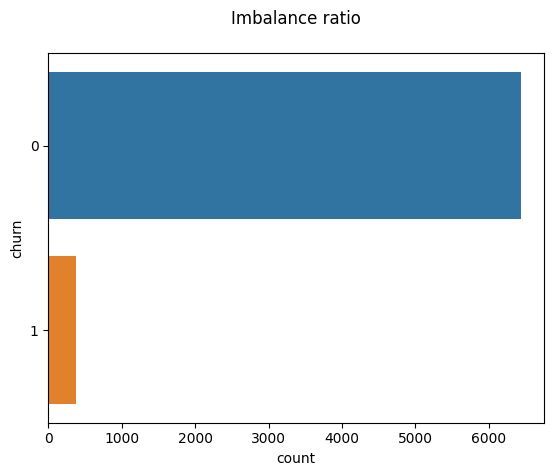

In [ ]:
sns.countplot(y='churn',data=filtered_data)
plt.title('Imbalance ratio\n')

Univariate Analysis

Text(0, 0.5, 'age')

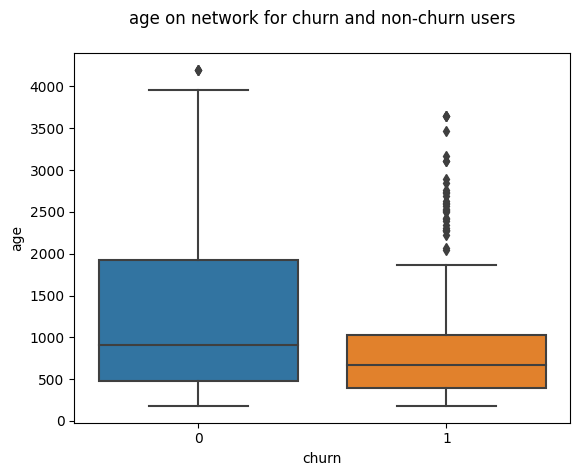

In [ ]:
#boxplot for age on network
sns.boxplot(x='churn',y='aon',data=filtered_data)
plt.title('age on network for churn and non-churn users\n')
plt.ylabel('age')

##Both lower and upper limit for Age on network is less for churn customers

##The median for churn customers is also less as compared to non churn customers

EDA for action phase

Text(0.5, 1.0, 'outgoing minutes of usage for churn and non-churn users\n')

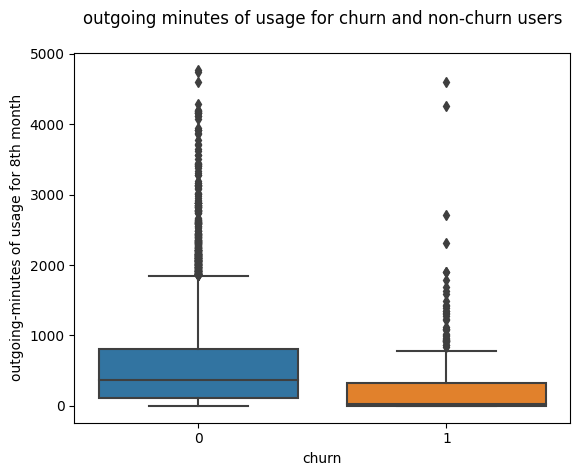

In [ ]:

sns.boxplot(x='churn',y='total_og_mou_8',data=filtered_data)
plt.ylabel('outgoing-minutes of usage for 8th month')
plt.title('outgoing minutes of usage for churn and non-churn users\n')

##Both Lower and Upper limit of outgoing minutes for churn is less than that of non-churn users.

##Median of is also lower for churn

##The outlier for churned customers crosses about 4500 outgoing minutes of usage for 8th month

Text(0.5, 1.0, 'total recharge for churn and non-churn users\n')

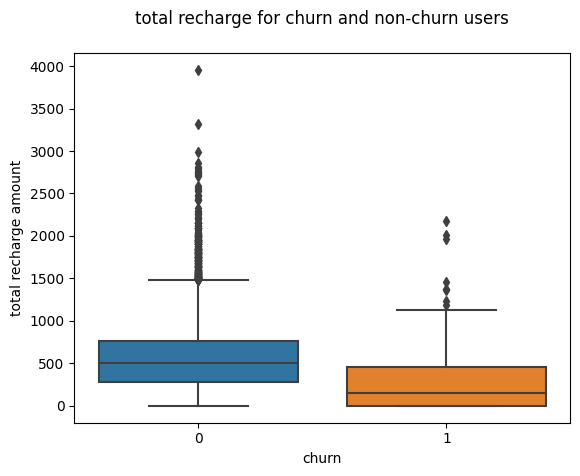

In [ ]:
#Boxplot for 8th month total recharge

sns.boxplot(x='churn',y='total_rech_amt_8',data=filtered_data)
plt.ylabel("total recharge amount")
plt.title('total recharge for churn and non-churn users\n')

##Total recharge for 8 months is more for the non churn customers

##The outlier for churned customers is about 3500 total recharge amount

Text(0.5, 1.0, 'incoming minutes of usage for churn and non-churn users\n')

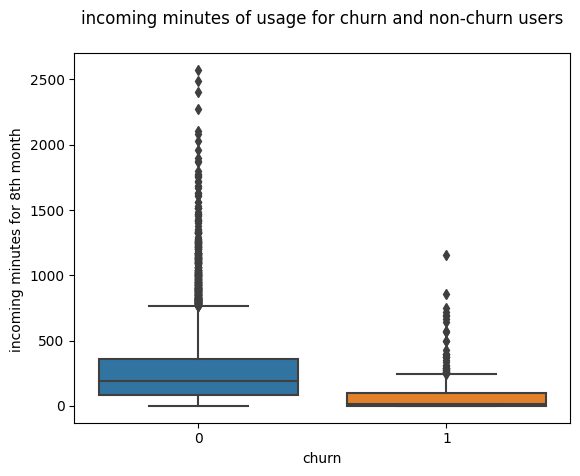

In [ ]:
# plotting for incoming minutes for 8 th month
sns.boxplot(x='churn',y='total_ic_mou_8',data=filtered_data)
plt.ylabel("incoming minutes for 8th month ")
plt.title('incoming minutes of usage for churn and non-churn users\n')

##The incoming minutes for 8th month for churned customer is less as compared to the non churn customrers
##The median for churned customer is less as compared to non churn customers and also the outlier for churned customer reached about 1000 incoming minutes of usage

EDA for all three months

Text(0, 0.5, 'average revenue per person')

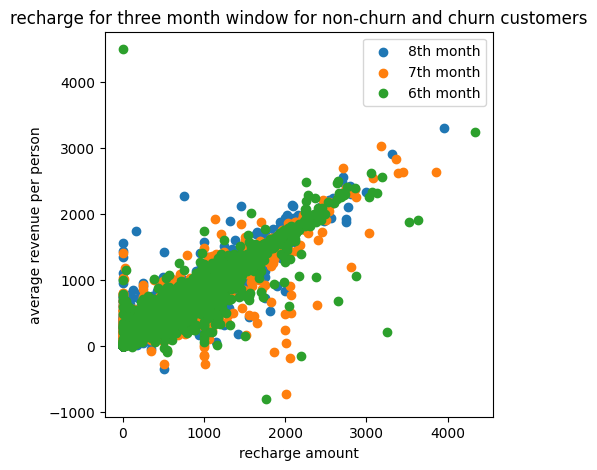

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='total_rech_amt_8',y='arpu_8',data=filtered_data,label='8th month')
plt.scatter(x='total_rech_amt_7',y='arpu_7',data=filtered_data,label='7th month')
plt.scatter(x='total_rech_amt_6',y='arpu_6',data=filtered_data,label='6th month')
plt.legend(loc='best')
plt.title('recharge for three month window for non-churn and churn customers')
plt.xlabel('recharge amount')
plt.ylabel('average revenue per person')

##Inferences: From above graphs we can observe that for churn customers range of average revenue per user and total recharge for three window is less than that of non-churn customers.

Text(0, 0.5, 'average revenue per person')

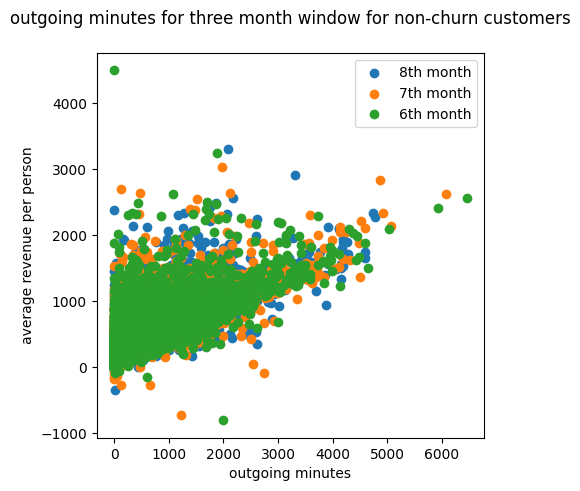

In [ ]:
#scatter plot for non-churn customers
plt.figure(figsize=(5,5))
plt.scatter(x='total_og_mou_8',y='arpu_8',data=filtered_data,label='8th month')
plt.scatter(x='total_og_mou_7',y='arpu_7',data=filtered_data,label='7th month')
plt.scatter(x='total_og_mou_6',y='arpu_6',data=filtered_data,label='6th month')
plt.legend(loc='best')
plt.title('outgoing minutes for three month window for non-churn customers\n')
plt.xlabel('outgoing minutes')
plt.ylabel('average revenue per person')

##Inferences From above graphs we can observe that for churn customers range of average revenue per user and outgoing for three window is less than that of non-churn customers.

##The average revenue per person id greated in the 6month as compared to other months

Text(0, 0.5, 'incoming minutes ')

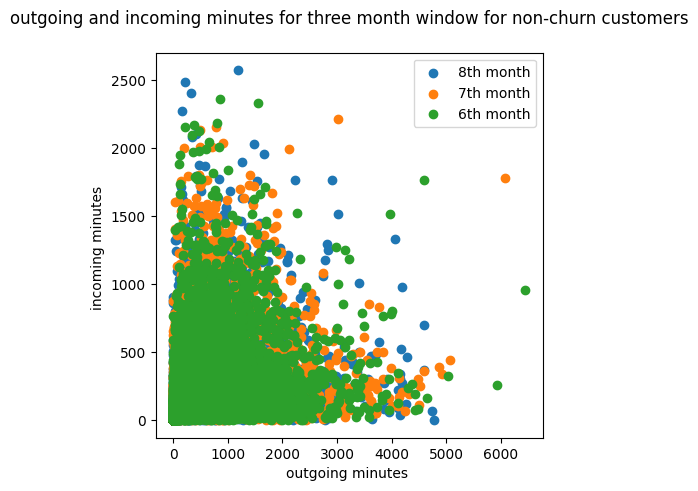

In [ ]:
#scatter plot for non-churn customers
plt.figure(figsize=(5,5))
plt.scatter(x='total_og_mou_8',y='total_ic_mou_8',data=filtered_data,label='8th month')
plt.scatter(x='total_og_mou_7',y='total_ic_mou_7',data=filtered_data,label='7th month')
plt.scatter(x='total_og_mou_6',y='total_ic_mou_6',data=filtered_data,label='6th month')

plt.legend(loc='best')
plt.title('outgoing and incoming minutes for three month window for non-churn customers\n')
plt.xlabel('outgoing minutes ')
plt.ylabel('incoming minutes ')

##Inferences

##From above two graphs we can observe that for churn customers range of average revenue per user and outgoing for three window is less than that of non-churn customers.

##The incoming minutes of usage for the 6th month is more as compared to others

Text(0, 0.5, '3g data in mb')

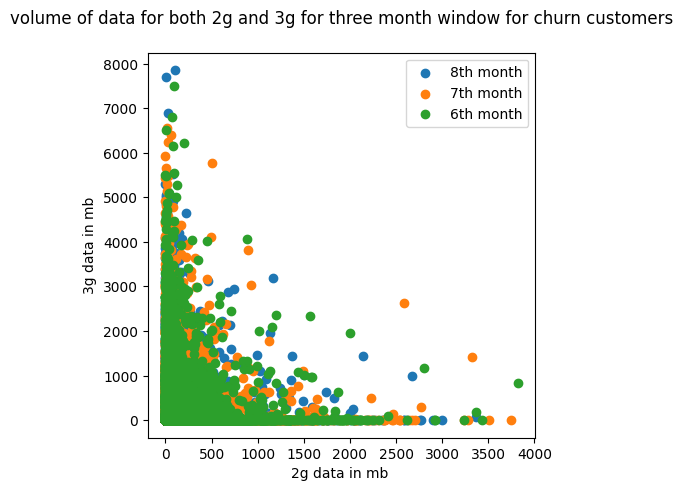

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='vol_2g_mb_8',y='vol_3g_mb_8',data=filtered_data,label='8th month')
plt.scatter(x='vol_2g_mb_7',y='vol_3g_mb_7',data=filtered_data,label='7th month')
plt.scatter(x='vol_2g_mb_6',y='vol_3g_mb_6',data=filtered_data,label='6th month')

plt.legend(loc='best')
plt.title('volume of data for both 2g and 3g for three month window for churn customers\n')
plt.xlabel('2g data in mb ')
plt.ylabel('3g data in mb')

In [ ]:
# calculating fb users for all months for non_churn
fb0=filtered_data[['fb_user_6','fb_user_7','fb_user_8']].sum()
fb0

fb_user_6    3536
fb_user_7    3564
fb_user_8    3302
dtype: int64

Text(0.5, 1.0, 'Total number of facebook users for three months window(non-churn users)\n  ')

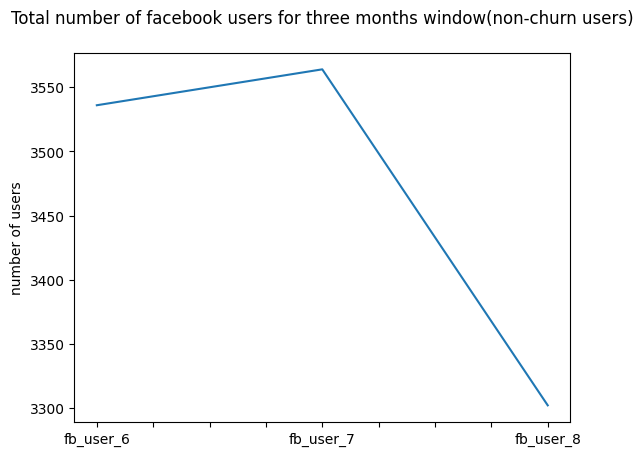

In [ ]:
fb0.plot()
plt.ylabel('number of users')

plt.title('Total number of facebook users for three months window(non-churn users)\n  ')

##The tota number of facebook users for the three months show a decrease in number of users at the end of the 8th month and it is peaked in the 7th month

Depicting the class imbalance which is then rectified after some lines using SMOTE


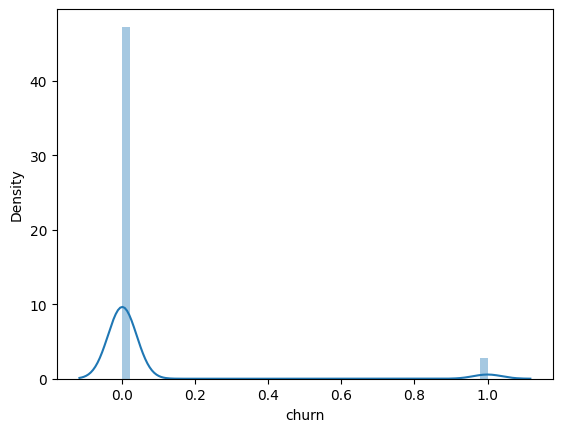

In [152]:
sns.distplot(filtered_data['churn'])
plt.show()

##This graph depicts that there is class imbalance as the churned customers are around 5 or 10 as compared to the non churn customers

## Model Building

In [ ]:
# Putting feature variable to X
X = filtered_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = filtered_data['churn']

In [ ]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

Rescaling of features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','week_of_last_rech_8','week_of_last_rech_7','week_of_last_rech_6','churn']
numerical=[col for col in X_train if col not in categorical]

In [ ]:
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,"4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00",...,"4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00","4,764.00"
mean,0.33,0.34,0.16,0.06,0.06,0.06,0.07,0.07,0.07,0.02,...,0.51,0.52,0.48,0.26,0.04,0.03,0.03,0.04,0.04,0.04
std,0.08,0.09,0.10,0.10,0.10,0.10,0.09,0.09,0.10,0.06,...,0.50,0.50,0.50,0.24,0.10,0.08,0.08,0.08,0.08,0.10
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.28,0.28,0.09,0.01,0.00,0.00,0.02,0.01,0.01,0.00,...,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.32,0.32,0.14,0.02,0.02,0.02,0.04,0.04,0.04,0.00,...,1.00,1.00,0.00,0.18,0.00,0.00,0.00,0.01,0.01,0.00
75%,0.37,0.37,0.21,0.07,0.07,0.06,0.10,0.09,0.10,0.00,...,1.00,1.00,1.00,0.42,0.03,0.03,0.02,0.04,0.05,0.04
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#Scale test data as well
X_test[numerical] = scaler.transform(X_test[numerical])
X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,"2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00",...,"2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00","2,043.00"
mean,0.33,0.33,0.16,0.06,0.06,0.05,0.07,0.07,0.07,0.02,...,0.54,0.52,0.49,0.26,0.05,0.03,0.03,0.04,0.04,0.05
std,0.08,0.08,0.10,0.10,0.10,0.09,0.08,0.08,0.09,0.07,...,0.50,0.50,0.50,0.24,0.11,0.08,0.09,0.08,0.08,0.11
min,0.18,0.12,-0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.28,0.28,0.09,0.00,0.00,0.00,0.01,0.01,0.01,0.00,...,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.32,0.32,0.14,0.02,0.02,0.02,0.04,0.04,0.04,0.00,...,1.00,1.00,0.00,0.17,0.00,0.00,0.00,0.01,0.01,0.01
75%,0.36,0.37,0.21,0.07,0.07,0.06,0.09,0.09,0.10,0.00,...,1.00,1.00,1.00,0.40,0.04,0.02,0.02,0.04,0.05,0.04
max,1.31,0.95,0.68,1.04,0.95,0.79,0.66,0.69,0.90,0.97,...,1.00,1.00,1.00,1.00,1.06,0.96,1.01,0.94,0.90,1.24


Handle class imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(9010, 136)
(9010,)


4505

In [ ]:
print("Percentage of churn observations after handling class imbalance: ", y_tr.sum()*100/y_tr.shape[0])
print("Train data size before applying smote: ", X_train.shape)
print("Train data size after applying smote: ", X_tr.shape)

Percentage of churn observations after handling class imbalance:  50.0
Train data size before applying smote:  (4764, 136)
Train data size after applying smote:  (9010, 136)


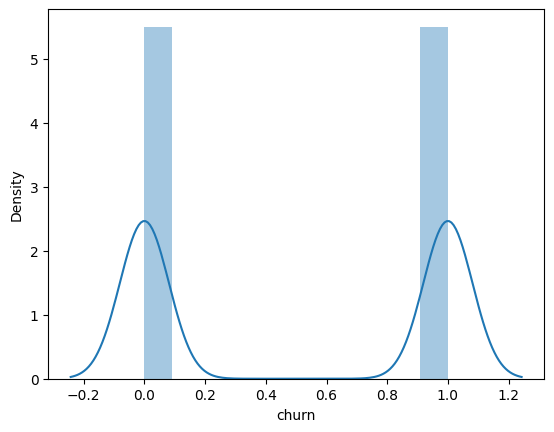

In [153]:
#class imabalance handled using SMOTE technique and depicted in the plot
sns.distplot(y_tr)
plt.show()

##Here the class imbalance has been rectified as the churn customers and non churn customers are more or less equal to each other

## Run first model logistic regression

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
X_tr_sm = sm.add_constant(X_tr)
logm1 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 9010
Model:                            GLM   Df Residuals:                     8875
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.2
Date:                Tue, 07 Nov 2023   Deviance:                       5234.3
Time:                        12:34:18   Pearson chi2:                 7.43e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5531
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.1710      0.694     -3.129      0.002      -3.531      -0.811
arpu_6                   11.7367      1.946      6.031      0.000       7.922      15.551
arpu_7                    3.3493      2.433      1.377      0.169      -1.419       8.117
arpu_8                   12.1631      2.312      5.260      0.000       7.631      16.695
onnet_mou_6             540.8113    127.614      4.238      0.000     290.692     790.931
onnet_mou_7              21.7474     55.686      0.391      0.696     -87.395     130.890
onnet_mou_8            -125.6723     58.547     -2.147      0.032    -240.423     -10.922
offnet_mou_6            712.0476    158.825      4.483      0.000     400.756    1023.339
offnet_mou_7              6.6307     68.526      0.097      0.923    -127.677     140.938
offnet_mou_8           -180.7301     65.863     -2.744      0.006    -309.819     -51.641
roam_ic_mou_6            -1.1442      1.094     -1.045      0.296      -3.289       1.001
roam_ic_mou_7             6.7530      1.100      6.138      0.000       4.597       8.909
roam_ic_mou_8            -1.5806      0.960     -1.646      0.100      -3.463       0.301
roam_og_mou_6          -137.6197     31.115     -4.423      0.000    -198.605     -76.635
roam_og_mou_7            -3.3197     11.232     -0.296      0.768     -25.334      18.694
roam_og_mou_8            34.9790     11.908      2.937      0.003      11.639      58.319
loc_og_t2t_mou_6       3.584e+04   1.82e+04      1.964      0.050      67.583    7.16e+04
loc_og_t2t_mou_7      -7.999e+04   1.68e+04     -4.755      0.000   -1.13e+05    -4.7e+04
loc_og_t2t_mou_8       3.569e+04   1.57e+04      2.274      0.023    4928.297    6.65e+04
loc_og_t2m_mou_6       3.826e+04   1.95e+04      1.963      0.050      54.836    7.65e+04
loc_og_t2m_mou_7      -7.856e+04   1.65e+04     -4.755      0.000   -1.11e+05   -4.62e+04
loc_og_t2m_mou_8       4.843e+04   2.13e+04      2.275      0.023    6700.748    9.02e+04
loc_og_t2f_mou_6       3043.4063   1547.808      1.966      0.049       9.759    6077.054
loc_og_t2f_mou_7      -6871.6068   1443.680     -4.760      0.000   -9701.168   -4042.046
loc_og_t2f_mou_8       3527.4337   1550.741      2.275      0.023     488.037    6566.831
loc_og_t2c_mou_6         -1.1694      0.668     -1.750      0.080      -2.479       0.140
loc_og_t2c_mou_7         -0.8286      0.818     -1.013      0.311      -2.431       0.774
loc_og_t2c_mou_8         -0.4160      0.930     -0.447      0.655      -2.239       1.407
loc_og_mou_6          -1.416e+05   2.86e+04     -4.947      0.000   -1.98e+05   -8.55e+04
loc_og_mou_7           1.785e+05   2.97e+04      6.011      0.000     1.2e+05    2.37e+05
loc_og_mou_8          -8400.1318   2.93e+04     -0.287      0.774   -6.58e+04     4.9e+04
std_og_t2t_mou_6      -

In [ ]:
#Make predictions on train set
y_train_pred = res.predict(X_tr_sm)
y_train_pred[:10]

0                   0.31
1                   0.02
2                   0.09
3                   0.00
4                   0.00
5                   0.46
6                   0.00
7                   0.27
8                   0.36
9                   0.35
dtype: float64

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.31,0
1,0,0.02,0
2,0,0.09,0
3,0,0.00,0
4,0,0.00,0


In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[3901  604]
 [ 303 4202]]
Accuracy of train data: 0.8993340732519423
Recall of train data: 0.9327413984461709


In [ ]:
#Make predictions on test data
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

23398                   0.00
4319                    0.39
8793                    0.65
5953                    0.00
23734                   0.06
11047                   0.56
21561                   0.16
17844                   0.80
26193                   0.40
7616                    0.18
dtype: float64

In [ ]:
#creating a dataframe for test data
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
23398,0,0.00,0
4319,0,0.39,0
8793,0,0.65,1
5953,0,0.00,0
23734,0,0.06,0


In [ ]:
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("Recall of test data:", metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

[[1661  265]
 [  46   71]]
Accuracy of test data: 0.8477728830151737
Recall of test data: 0.6068376068376068


In [ ]:
#Other metrics for test data
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.6068376068376068
Specificity: 0.8624091381100727
False Positive Rate: 0.1375908618899273
Positive Predictive Value : 0.2113095238095238
Negative Predictive Value : 0.9730521382542472


In [ ]:
# Let's see the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10))
#sns.heatmap(X_train.corr(),annot = True)
X_train.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
arpu_6,1.00,0.59,0.49,0.45,0.29,0.25,0.61,0.39,0.34,0.09,...,-0.17,-0.24,-0.18,0.07,0.03,0.04,0.08,-0.04,-0.16,-0.10
arpu_7,0.59,1.00,0.66,0.31,0.45,0.37,0.40,0.59,0.47,0.09,...,-0.25,-0.15,-0.15,0.04,0.05,0.07,0.02,-0.15,-0.02,-0.09
arpu_8,0.49,0.66,1.00,0.22,0.30,0.47,0.29,0.42,0.64,0.07,...,-0.17,-0.13,0.00,0.09,0.13,0.06,0.05,-0.09,-0.08,0.08
onnet_mou_6,0.45,0.31,0.22,1.00,0.77,0.65,0.08,0.03,0.03,-0.00,...,-0.30,-0.31,-0.26,-0.05,-0.13,-0.13,-0.12,-0.17,-0.17,-0.14
onnet_mou_7,0.29,0.45,0.30,0.77,1.00,0.80,0.03,0.07,0.05,0.03,...,-0.32,-0.30,-0.25,-0.06,-0.13,-0.13,-0.13,-0.17,-0.16,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jul_vbc_3g,0.04,0.07,0.06,-0.13,-0.13,-0.11,-0.11,-0.12,-0.09,-0.01,...,0.31,0.34,0.30,0.04,0.69,1.00,0.67,0.20,0.25,0.19
jun_vbc_3g,0.08,0.02,0.05,-0.12,-0.13,-0.11,-0.11,-0.13,-0.09,-0.02,...,0.33,0.29,0.29,0.05,0.64,0.67,1.00,0.30,0.18,0.18
total_rech_data_amt_6,-0.04,-0.15,-0.09,-0.17,-0.17,-0.15,-0.19,-0.20,-0.17,-0.06,...,0.44,0.35,0.35,-0.06,0.19,0.20,0.30,1.00,0.49,0.45
total_rech_data_amt_7,-0.16,-0.02,-0.08,-0.17,-0.16,-0.14,-0.21,-0.20,-0.17,-0.04,...,0.35,0.44,0.37,-0.07,0.20,0.25,0.18,0.49,1.00,0.53


<Figure size 2000x1000 with 0 Axes>

Even though we got decent result (81% accuracy and 71% recall) from logistic regression on entire data set, as seen in correlation matrix, there are many correlated features. One way to handle this is by reducing the number of features by PCA. PCA will create non-correlated features.

## PCA on the data

In [ ]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [ ]:
#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100, svd_solver='randomized')

In [ ]:
pca.components_

array([[-3.00115881e-02, -2.18757062e-02,  5.06155593e-03, ...,
         3.84897193e-02,  4.40975421e-02,  4.09457569e-02],
       [ 7.27863159e-02,  1.35462872e-01,  1.96870936e-01, ...,
        -1.42568426e-02,  1.05394333e-03,  2.63390355e-02],
       [ 2.56249222e-02, -1.05770701e-02,  1.83738312e-02, ...,
        -3.83345008e-03, -2.15868144e-02, -4.47459251e-02],
       ...,
       [-2.76349485e-07,  3.15826131e-07,  1.85780664e-07, ...,
        -1.92563358e-07, -2.77449206e-07,  3.32388192e-07],
       [ 0.00000000e+00, -1.23519766e-18, -6.23417700e-17, ...,
        -5.19900008e-18, -1.74289049e-16,  4.65345232e-18],
       [ 0.00000000e+00, -1.78396665e-17,  9.55876697e-17, ...,
         6.07346839e-17, -2.54814911e-17, -8.97650087e-18]])

In [ ]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,Feature
0,-0.03,0.07,0.03,arpu_6
1,-0.02,0.14,-0.01,arpu_7
2,0.01,0.20,0.02,arpu_8
3,-0.06,0.04,-0.09,onnet_mou_6
4,-0.05,0.08,-0.10,onnet_mou_7


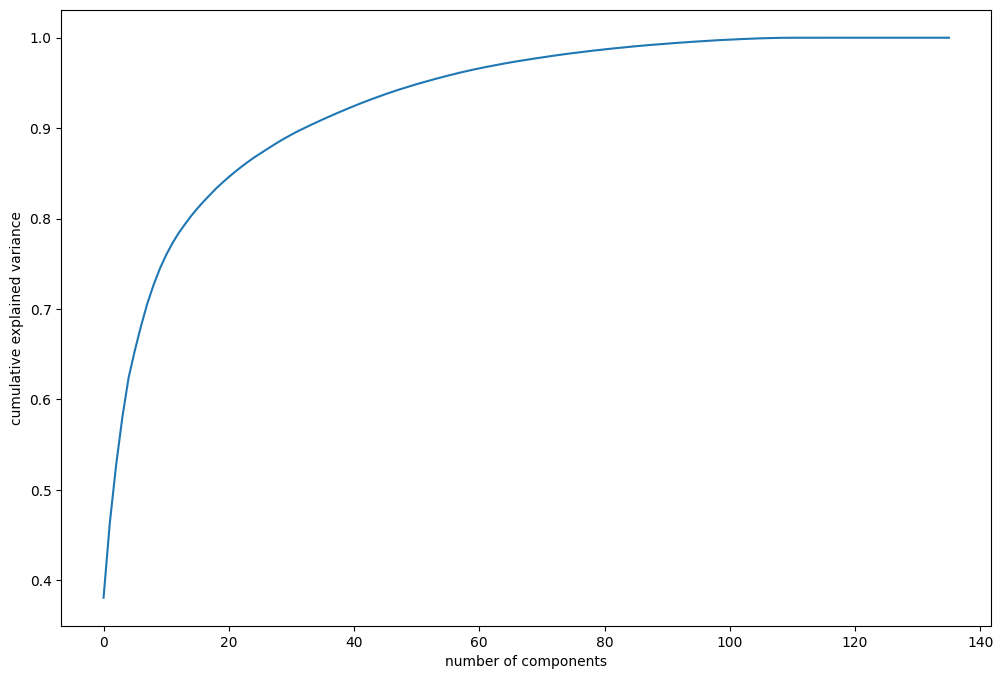

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like ~58 components are enough to describe 96% of the variance in the dataset
- Let's choose number of features describing 96% of variance

In [ ]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
#pca_final = IncrementalPCA(n_components=30)
pca_final = PCA(0.96)

### 4.6.4 Basis transformation - getting the data onto our PCs

In [ ]:
df_tr_pca = pca_final.fit_transform(X_tr)
df_tr_pca.shape

(9010, 58)

In [ ]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_tr_pca.transpose())

<Axes: >

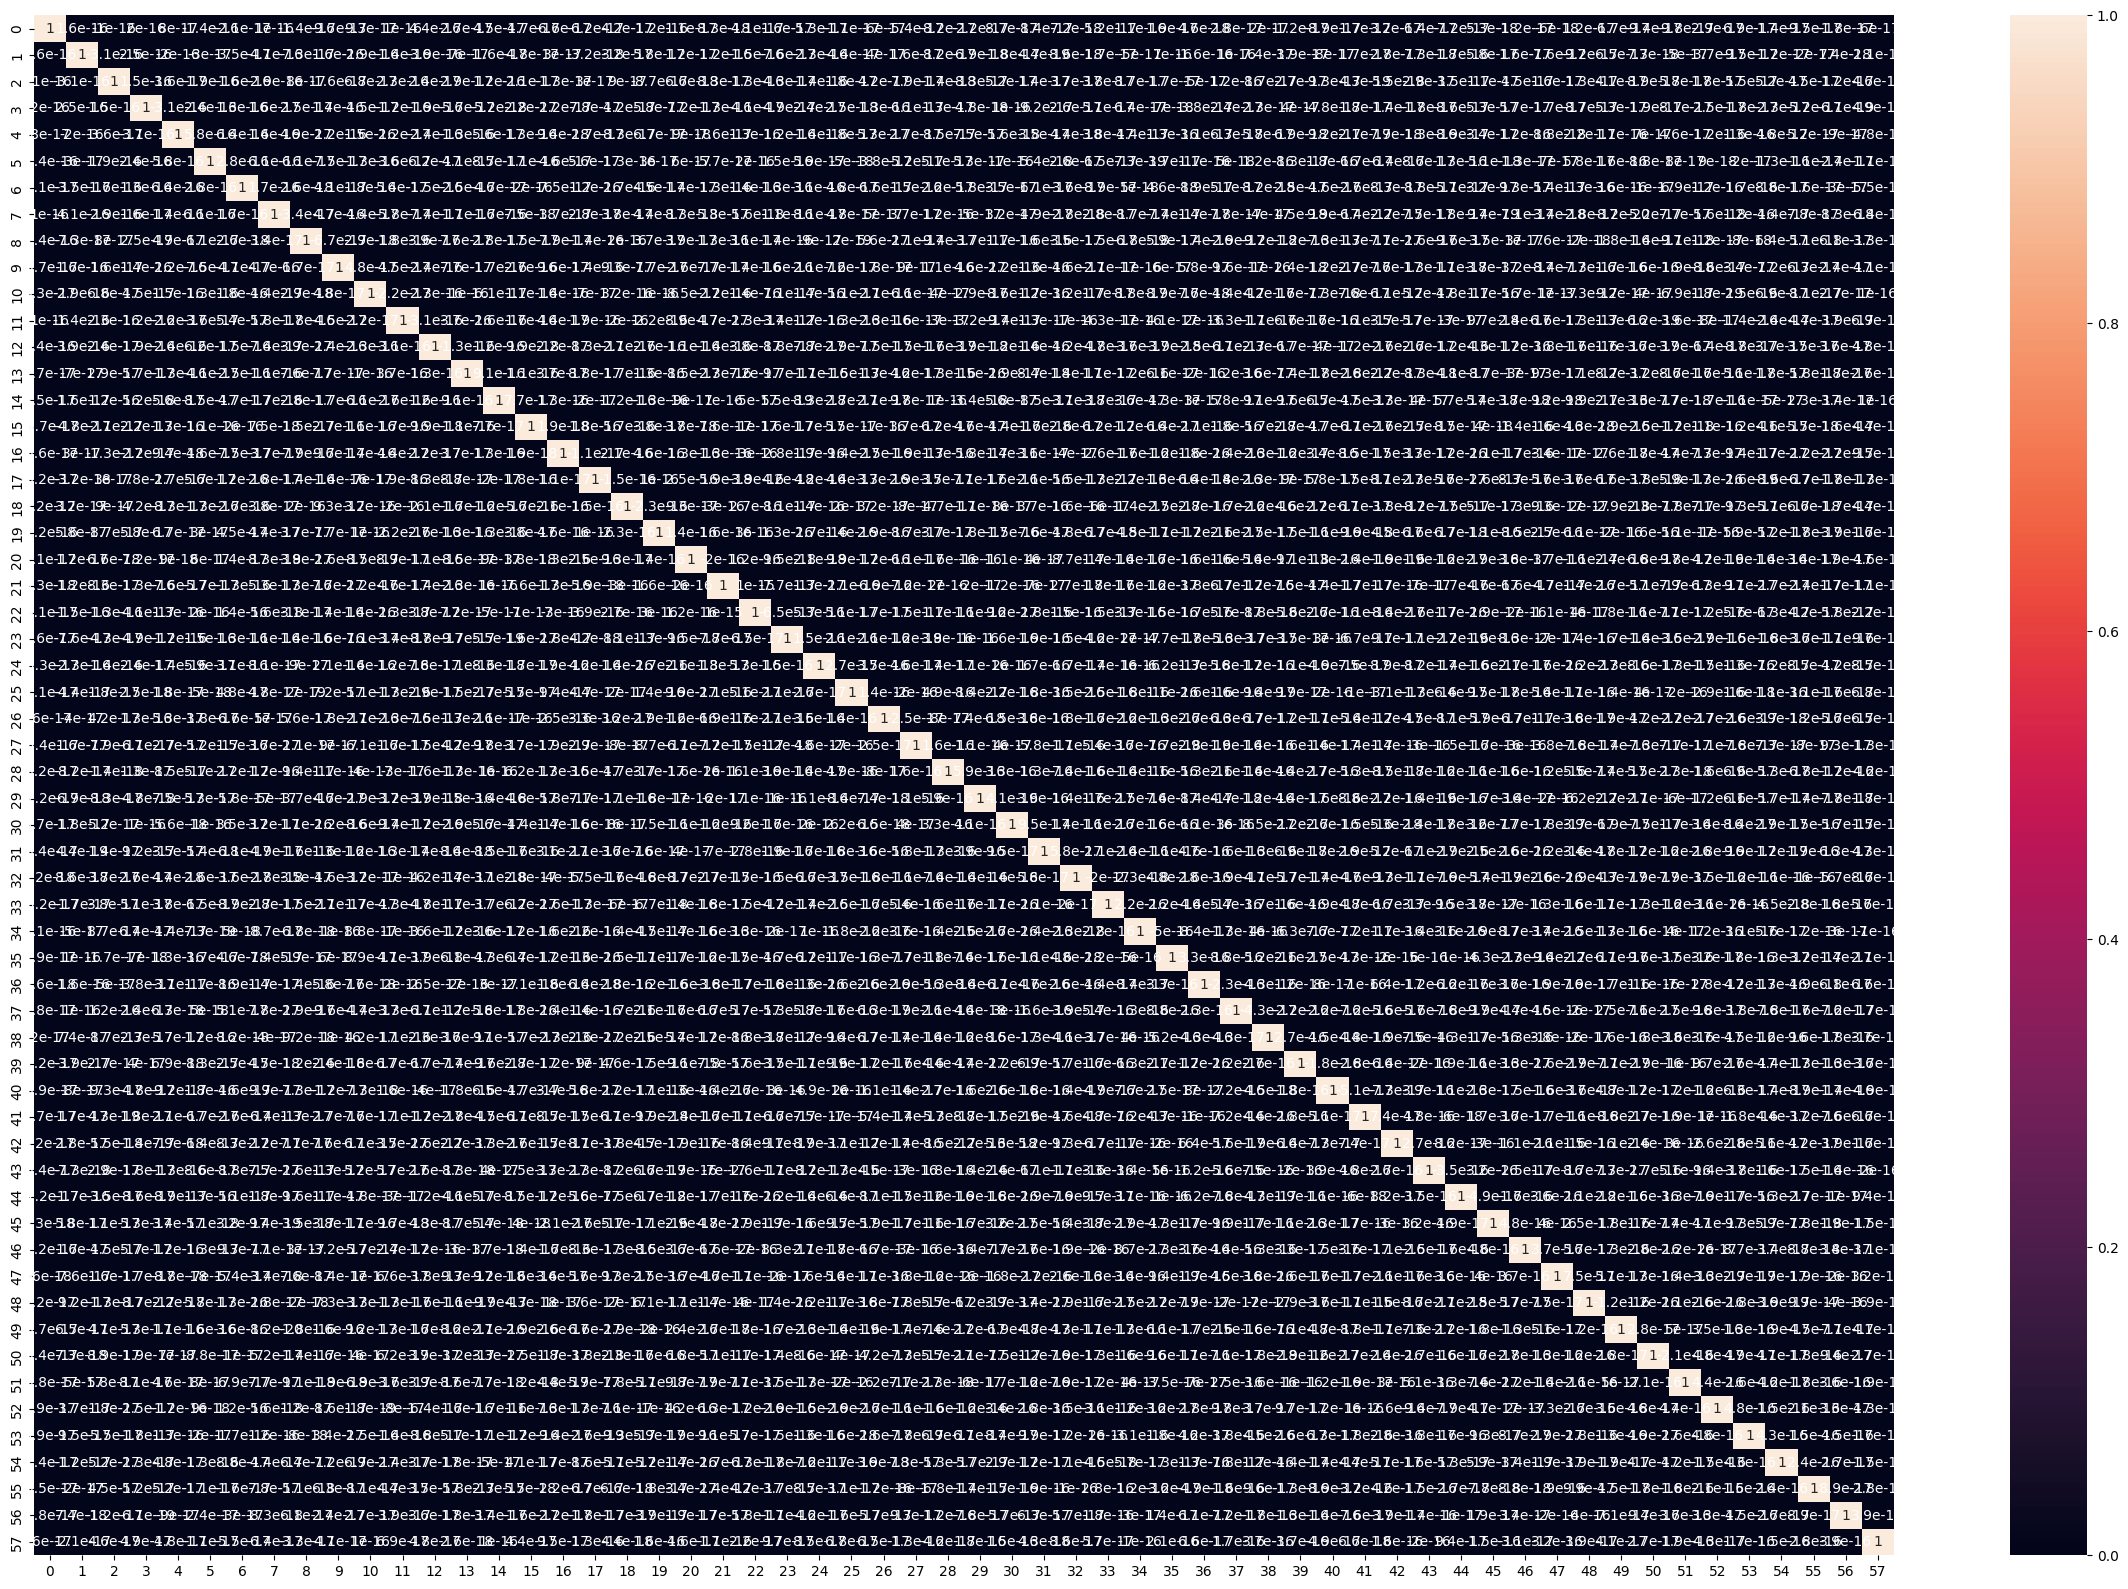

In [ ]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (30,20))
sns.heatmap(corrmat,annot = True)

In [ ]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.0245341146608107e-15 , min corr:  -7.402993973653478e-16


In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2043, 58)

## Applying logistic regression on Principal components

In [ ]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca_1 = learner_pca.fit(df_tr_pca,y_tr)

In [ ]:
#Making prediction on the test data
pred_probs_test = model_pca_1.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.85'

In [ ]:
#Make predictions
y_train_pred_1 = model_pca_1.predict_proba(df_tr_pca)[:,1]
y_test_pred_1 = model_pca_1.predict_proba(df_test_pca)[:,1]

In [ ]:
y_train_pred_1 = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred_1})
y_train_pred_1.head()
y_train_pred_1['predicted'] = y_train_pred_1.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_1 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_1})
y_test_pred_1.head()
y_test_pred_1['predicted'] = y_test_pred_1.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_1.head()

,Churn,Churn_Prob,predicted
23398,0,0.03,0
4319,0,0.65,1
8793,0,0.42,0
5953,0,0.04,0
23734,0,0.19,0


In [ ]:
confusion_test_1 = metrics.confusion_matrix(y_test_pred_1.Churn, y_test_pred_1.predicted )
print(confusion_test_1)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_1.Churn, y_test_pred_1.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_1.Churn, y_test_pred_1.predicted))
confusion_train_1 = metrics.confusion_matrix(y_train_pred_1.Churn, y_train_pred_1.predicted )
print(confusion_train_1)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_1.Churn, y_train_pred_1.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_1.Churn, y_train_pred_1.predicted))

[[1616  310]
 [  28   89]]
Accuracy of test data: 0.8345570239843367
Recall of test data: 0.7606837606837606
[[3762  743]
 [ 487 4018]]
Accuracy of train data: 0.8634850166481687
Recall of train data: 0.8918978912319645


OBSERVATIONS

1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. SMOTE is applied to balance data
3. ~80% accuracy and 78% recall on test data obtained with Logistic regresision on PCA features explaining 96% variance
4. 96% variance can be explained with 58 features and maintain 80% accuracy

#Hyper parameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#step 1: create cross validation scheme

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specify range of hyperparameters
hyper_params = [{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]

#perform grid search
lm = LogisticRegression()

model_cv = GridSearchCV(lm, hyper_params, scoring = "recall", cv = folds, verbose = 0, return_train_score = True)

#fit the model
model_cv.fit(df_tr_pca, y_tr)


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}],
             return_train_score=True, scoring='recall')

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.04,0.00,0.00,0.00,0.00,{'C': 0.001},0.80,0.80,0.80,0.78,...,0.79,0.01,8,0.79,0.79,0.79,0.79,0.79,0.79,0.00
1,0.05,0.01,0.01,0.00,0.01,{'C': 0.01},0.84,0.85,0.83,0.83,...,0.83,0.01,7,0.84,0.83,0.83,0.83,0.83,0.83,0.00
2,0.08,0.01,0.01,0.00,0.10,{'C': 0.1},0.86,0.88,0.88,0.86,...,0.87,0.01,6,0.87,0.87,0.87,0.87,0.87,0.87,0.00
3,0.07,0.01,0.00,0.00,1,{'C': 1},0.90,0.90,0.89,0.88,...,0.89,0.01,5,0.89,0.89,0.89,0.89,0.89,0.89,0.00
4,0.12,0.00,0.00,0.00,10,{'C': 10},0.90,0.91,0.89,0.88,...,0.89,0.01,4,0.89,0.90,0.90,0.90,0.89,0.90,0.00
5,0.13,0.01,0.00,0.00,100,{'C': 100},0.90,0.91,0.89,0.88,...,0.89,0.01,1,0.89,0.90,0.89,0.90,0.89,0.90,0.00
6,0.13,0.01,0.00,0.00,1000,{'C': 1000},0.90,0.91,0.89,0.88,...,0.89,0.01,2,0.89,0.90,0.89,0.90,0.89,0.90,0.00
7,0.14,0.00,0.00,0.00,10000,{'C': 10000},0.90,0.91,0.89,0.88,...,0.89,0.01,2,0.89,0.90,0.89,0.90,0.89,0.90,0.00


In [ ]:
best_value_of_C = model_cv.best_estimator_.get_params()['C']
print('Best value of C:',best_value_of_C)

Best value of C: 100


Running logistic regression with best value of C

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(C=best_value_of_C)
model_pca_2 = learner_pca.fit(df_tr_pca, y_tr)

In [ ]:
#Making prediction on the test data
pred_probs_test_2 = model_pca_2.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_2))

'0.85'

Make predictions

In [ ]:
y_train_pred_2 = model_pca_2.predict_proba(df_tr_pca)[:,1]
y_test_pred_2 = model_pca_2.predict_proba(df_test_pca)[:,1]

In [ ]:
y_train_pred_2 = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred_2})
y_train_pred_2.head()
y_train_pred_2['predicted'] = y_train_pred_2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_2 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_2})
y_test_pred_2.head()
y_test_pred_2['predicted'] = y_test_pred_2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_2.head()

,Churn,Churn_Prob,predicted
23398,0,0.01,0
4319,0,0.67,1
8793,0,0.41,0
5953,0,0.02,0
23734,0,0.17,0


In [ ]:
confusion_test_2 = metrics.confusion_matrix(y_test_pred_2.Churn, y_test_pred_2.predicted)
print(confusion_test_2)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_2.Churn, y_test_pred_2.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_2.Churn, y_test_pred_2.predicted))
confusion_train_2 = metrics.confusion_matrix(y_train_pred_2.Churn, y_train_pred_2.predicted )
print(confusion_train_2)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_2.Churn, y_train_pred_2.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_2.Churn, y_train_pred_2.predicted))

[[1602  324]
 [  30   87]]
Accuracy of test data: 0.8267254038179148
Recall of test data: 0.7435897435897436
[[3758  747]
 [ 466 4039]]
Accuracy of train data: 0.8653718091009989
Recall of train data: 0.8965593784683685


In [ ]:
def draw_roc(actual, probs):
  fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
  auc_score = metrics.roc_auc_score(actual, probs)
  plt.figure(figsize= (6,6))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
  return None


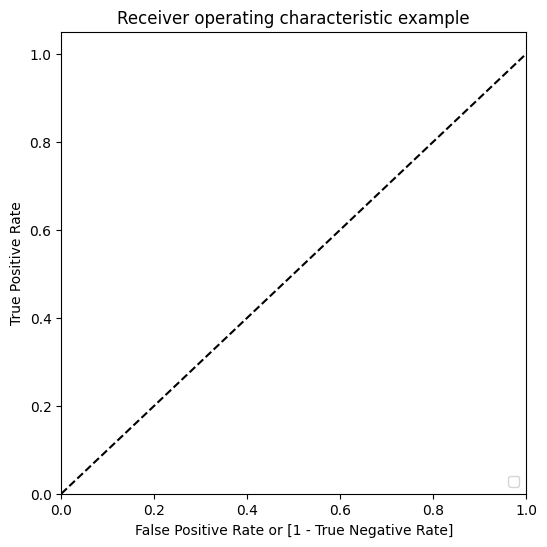

'0.85'

In [ ]:
%matplotlib inline
draw_roc(y_test_pred_2.Churn, y_test_pred_2.Churn_Prob)
"{:2.2f}".format(metrics.roc_auc_score(y_test_pred_2.Churn, y_test_pred_2.Churn_Prob))

In [ ]:
#Other metrics for test data
TP = confusion_test_2[1,1] # true positive
TN = confusion_test_2[0,0] # true negatives
FP = confusion_test_2[0,1] # false positives
FN = confusion_test_2[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.7435897435897436
Specificity: 0.8317757009345794
False Positive Rate: 0.16822429906542055
Positive Predictive Value : 0.2116788321167883
Negative Predictive Value : 0.9816176470588235


Finding optimal cutoff

In [ ]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
for i in numbers:
  y_train_pred_2[i] = y_train_pred_2.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_2.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.23,0,1,1,1,0,0,0,0,0,0,0
1,0,0.02,0,1,0,0,0,0,0,0,0,0,0
2,0,0.23,0,1,1,1,0,0,0,0,0,0,0
3,0,0.03,0,1,0,0,0,0,0,0,0,0,0
4,0,0.00,0,1,0,0,0,0,0,0,0,0,0


Now lets calculate the accracy specificity and sensitivity

In [ ]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy","sensitivity","specificity"])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
for i in num:
  cm1 = metrics.confusion_matrix(y_train_pred_2.Churn, y_train_pred_2[i])
  total1 = sum(sum(cm1))
  accuracy = (cm1[0,0]+cm1[1,1])/total1
  specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensitivity = cm1[1,1]+(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
cutoff_df



,prob,accuracy,sensitivity,specificity
0.00,0.00,0.50,"9,010.00",0.00
0.10,0.10,0.74,"8,927.00",0.51
0.20,0.20,0.80,"8,860.00",0.63
0.30,0.30,0.84,"8,792.00",0.72
0.40,0.40,0.86,"8,703.00",0.78
0.50,0.50,0.87,"8,544.00",0.83
0.60,0.60,0.86,"8,350.00",0.87
0.70,0.70,0.84,"7,957.00",0.91
0.80,0.80,0.78,"7,299.00",0.94
0.90,0.90,0.65,"5,997.00",0.97


<Figure size 500x1000 with 0 Axes>

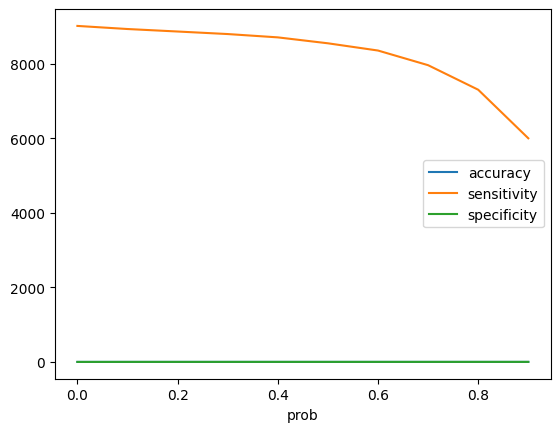

In [ ]:
plt.figure(figsize=(5,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

Ideal cut-off point is ~.5. We made our previous anaysis with this so it is the final result.

## 4.6.6 Logistic Regression with class weight to handle imbalance instead of SMOTE

In [ ]:
pca.fit(X_train)


PCA(random_state=100, svd_solver='randomized')

In [ ]:
pca.components_

array([[ 2.70304586e-02,  2.79537317e-02,  2.13589162e-02, ...,
        -4.39768294e-02, -4.57192731e-02, -5.19483207e-02],
       [ 9.64891488e-02,  1.15134062e-01,  1.59898930e-01, ...,
        -2.04742170e-02, -1.63925368e-02, -2.92413633e-03],
       [ 4.50239101e-02,  1.06516509e-01,  1.35575301e-01, ...,
        -6.14939719e-03,  2.35651274e-02,  5.15586406e-02],
       ...,
       [-1.82096019e-07, -2.17250798e-07,  1.40936963e-07, ...,
        -1.24117798e-07,  7.50263479e-08,  9.98278555e-08],
       [-0.00000000e+00, -2.95168461e-17,  1.97161775e-17, ...,
        -1.10053692e-16,  2.16185153e-16, -1.55682136e-16],
       [-0.00000000e+00, -1.11139104e-16,  1.41070327e-16, ...,
         1.13525138e-16, -3.90200735e-16,  3.95826918e-18]])

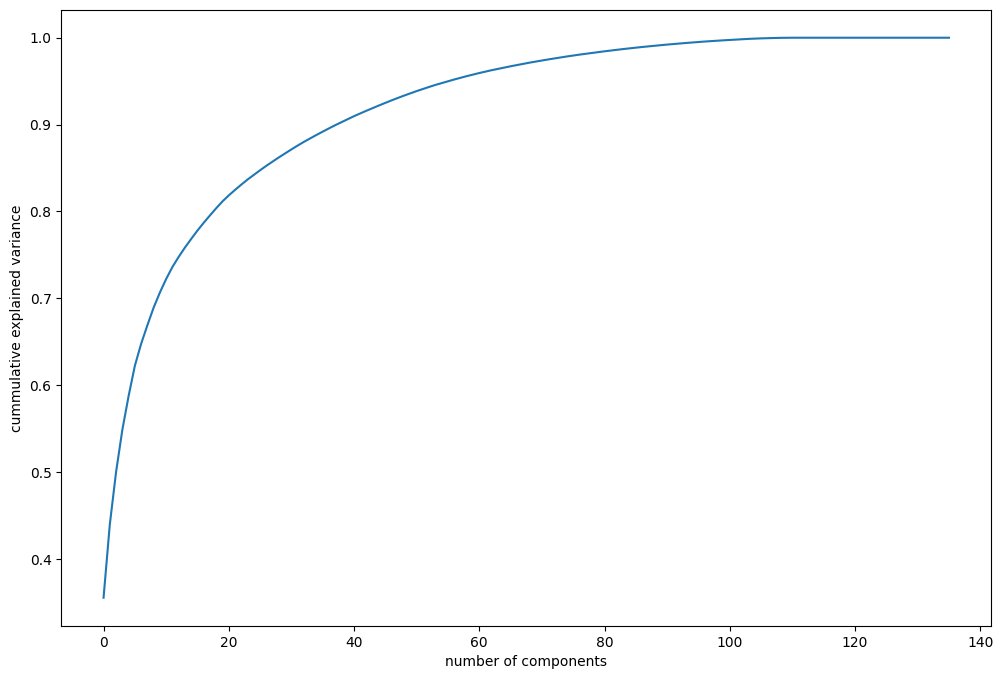

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cummulative explained variance")
plt.show()

In [ ]:
pca_ci = PCA(.97)

In [ ]:
df_train_pca_ci = pca_ci.fit_transform(X_train)
print(df_train_pca_ci.shape)
df_test_pca_ci = pca_ci.transform(X_test)
print(df_test_pca_ci.shape)

(4764, 69)
(2043, 69)


69 features explain 97% variance

Hyperparameter tuning

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#create a croos validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#Specify range of hyperparameters to tune
hyper_params = [{"C": [1, 10, 100, 1000, 100000, 1000000000]}, {"class_weight": [{ 0:w, 1:1-w} for w in [.02,.03,.04,.05,.10]]}]

lm = LogisticRegression()

model_cv = GridSearchCV(lm, hyper_params, scoring=["recall","accuracy"], cv = folds, refit = "recall", verbose=0, return_train_score=True)
model_cv.fit(df_train_pca_ci, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000, 100000, 1000000000]},
                         {'class_weight': [{0: 0.02, 1: 0.98},
                                           {0: 0.03, 1: 0.97},
                                           {0: 0.04, 1: 0.96},
                                           {0: 0.05, 1: 0.95},
                                           {0: 0.1, 1: 0.9}]}],
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'])

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_C', 'param_class_weight', 'mean_test_recall','mean_train_recall','mean_test_accuracy', 'mean_train_accuracy']]

,param_C,param_class_weight,mean_test_recall,mean_train_recall,mean_test_accuracy,mean_train_accuracy
0,1,NaN,0.05,0.07,0.94,0.95
1,10,NaN,0.10,0.13,0.94,0.95
2,100,NaN,0.15,0.16,0.94,0.95
3,1000,NaN,0.14,0.17,0.94,0.95
4,100000,NaN,0.14,0.17,0.94,0.95
5,1000000000,NaN,0.14,0.17,0.94,0.95
6,NaN,"{0: 0.02, 1: 0.98}",0.93,0.96,0.49,0.49
7,NaN,"{0: 0.03, 1: 0.97}",0.89,0.93,0.64,0.64
8,NaN,"{0: 0.04, 1: 0.96}",0.85,0.88,0.72,0.72
9,NaN,"{0: 0.05, 1: 0.95}",0.82,0.85,0.77,0.78


In [ ]:
best_values = model_cv.best_estimator_.get_params()
print('Best value of C:',best_values['C'])
print('Best value of class_weight:',best_values['class_weight'])

Best value of C: 1.0
Best value of class_weight: {0: 0.02, 1: 0.98}


Even though best values for recall are C=1 and class_Weight={0:.02,1:.98}, with recall of 90+%, accuracy drops significantly to 47%. SO choosing class_weight {0: 0.04, 1: 0.96} instead.

Train model

In [ ]:
#training data on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca_ci = LogisticRegression(C=1, class_weight = {0: 0.04, 1: 0.96})
model_pca_ci  = learner_pca_ci.fit(df_train_pca_ci, y_train)

In [ ]:
#Make predictions on test set
pred_probs_test_ci = model_pca_ci.predict_proba(df_test_pca_ci)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_ci))

'0.84'

In [ ]:
y_train_pred_ci = model_pca_ci.predict_proba(df_train_pca_ci)[:,1]
y_test_pred_ci = model_pca_ci.predict_proba(df_test_pca_ci)[:,1]

In [ ]:
y_train_pred_final_ci = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred_ci})
y_train_pred_final_ci.head()
y_train_pred_final_ci['predicted'] = y_train_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_test_pred_final_ci = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_ci})
y_test_pred_final_ci.head()
y_test_pred_final_ci['predicted'] = y_test_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
# Let's see the head
y_test_pred_final_ci.head()

,Churn,Churn_Prob,predicted
23398,0,0.37,0
4319,0,0.66,1
8793,0,0.59,1
5953,0,0.19,0
23734,0,0.31,0


In [ ]:
confusion_test_ci = metrics.confusion_matrix(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted )
print(confusion_test_ci)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted))
confusion_train_ci = metrics.confusion_matrix(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted )
print(confusion_train_ci)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted))

[[1400  526]
 [  23   94]]
Accuracy of test data: 0.7312775330396476
Recall of test data: 0.8034188034188035
[[3240 1265]
 [  31  228]]
Accuracy of train data: 0.7279596977329975
Recall of train data: 0.8803088803088803


In [ ]:
#Other metrics for test data
TP = confusion_test_ci[1,1] # true positive
TN = confusion_test_ci[0,0] # true negatives
FP = confusion_test_ci[0,1] # false positives
FN = confusion_test_ci[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.8034188034188035
Specificity: 0.726895119418484
False Positive Rate: 0.2731048805815161
Positive Predictive Value : 0.15161290322580645
Negative Predictive Value : 0.9838369641602249


Find optimal cut off

In [ ]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
  y_train_pred_final_ci[i] = y_train_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_ci.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
16867,0,0.59,1,1,1,1,1,1,1,0,0,0,0
15581,0,0.14,0,1,1,0,0,0,0,0,0,0,0
15145,0,0.50,1,1,1,1,1,1,1,0,0,0,0
24020,0,0.30,0,1,1,1,1,0,0,0,0,0,0
23635,0,0.03,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_ci.Churn, y_train_pred_final_ci[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.05,1.00,0.00
0.10,0.10,0.14,0.99,0.09
0.20,0.20,0.30,0.98,0.27
0.30,0.30,0.47,0.96,0.44
0.40,0.40,0.62,0.94,0.60
0.50,0.50,0.73,0.88,0.72
0.60,0.60,0.82,0.81,0.82
0.70,0.70,0.89,0.71,0.90
0.80,0.80,0.94,0.45,0.96
0.90,0.90,0.95,0.13,0.99


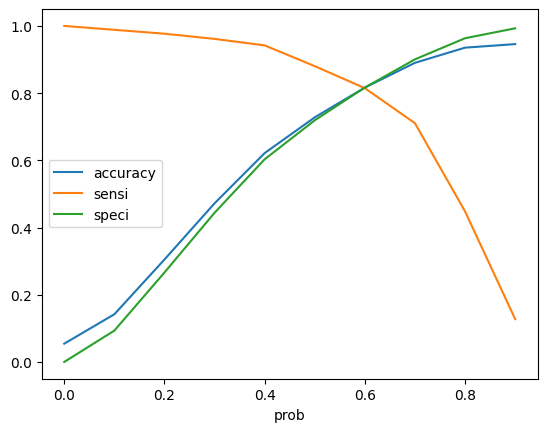

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Even though ideal cut-off is close to 0.6 but since we prefer higher recall, we will go ahead with model with 0.5 cutoff

We got a model with ~84% recall and 71% accuracy with logistic regression using class_weight. Our previous model with SMOTE was with accuracy 80% bur lower recall of 79%.

#SVM

SVM on tain data

In [ ]:
#from sklearn.svm import SVC
#model = SVC(C=1)

#model.fit(df_tr_pca, y_tr)

In [ ]:
#y_train_pred_svm = model.predict(df_tr_pca)
#y_test_pred_svm = model.predict(df_test_pca)


In [ ]:
'''confusion_test_svm = metrics.confusion_matrix(y_test, y_test_pred_svm )
print(confusion_test_svm)
print("Accuracy of test data:", metrics.accuracy_score(y_test, y_test_pred_svm))
print("Recall of test data:",metrics.recall_score(y_test, y_test_pred_svm))
confusion_train_svm = metrics.confusion_matrix(y_tr, y_train_pred_svm)
print(confusion_train_svm)
print("Accuracy of train data:", metrics.accuracy_score(y_tr, y_train_pred_svm))
print("Recall of train data:", metrics.recall_score(y_tr, y_train_pred_svm))'''

'confusion_test_svm = metrics.confusion_matrix(y_test, y_test_pred_svm )\nprint(confusion_test_svm)\nprint("Accuracy of test data:", metrics.accuracy_score(y_test, y_test_pred_svm))\nprint("Recall of test data:",metrics.recall_score(y_test, y_test_pred_svm))\nconfusion_train_svm = metrics.confusion_matrix(y_tr, y_train_pred_svm)\nprint(confusion_train_svm)\nprint("Accuracy of train data:", metrics.accuracy_score(y_tr, y_train_pred_svm))\nprint("Recall of train data:", metrics.recall_score(y_tr, y_train_pred_svm))'

#Decision Tree

Using Lasso as feature reduction technique

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svc = LinearSVC(C=0.01, penalty = "l1", dual = False)
lasso = svc.fit(X_tr, y_tr)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices = True)

print(X_lasso.shape)
print(pos)

(9010, 15)
[  0   1  14  39  40  53  80  83  95 101 121 126 128 129 135]


In [ ]:
l_features = list(filtered_data.columns[pos])
print(l_features)

['mobile_number', 'arpu_6', 'roam_og_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'total_og_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'total_rech_amt_7', 'last_day_rch_amt_7', 'monthly_3g_6', 'sachet_3g_8', 'fb_user_7', 'fb_user_8', 'total_rech_data_amt_7']


Lasso gave 29 features we will use this to build our decission trees

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

Perform prediction and evaluate model

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test_lasso)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1926
           1       0.27      0.73      0.40       117

    accuracy                           0.87      2043
   macro avg       0.63      0.80      0.66      2043
weighted avg       0.94      0.87      0.90      2043



In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("Accuracy:", accuracy_score(y_test,y_pred_default))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test,y_pred_default))

[[1700  226]
 [  32   85]]
Accuracy: 0.8737151248164464
Recall: 0.7264957264957265


Sensitivity is low we will tune the decision tree

#Hyperparameter tuning

In [ ]:
#create the parameter grid
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "max_depth": range(5,15, 5),
    "min_samples_leaf": range(1, 150, 30),
    "min_samples_split": range(2, 150 ,30),
    "criterion" : ["entropy","gini"]
}

n_folds = 5

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1, scoring=["recall", "accuracy"], refit = "recall")

grid_search.fit(X_lasso, y_tr)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(1, 150, 30),
                         'min_samples_split': range(2, 150, 30)},
             refit='recall', scoring=['recall', 'accuracy'], verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
cv_results[['param_criterion','param_max_depth', 'param_min_samples_leaf','param_min_samples_split','mean_test_recall','mean_test_accuracy']]

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_recall,mean_test_accuracy
0,entropy,5,1,2,0.92,0.89
1,entropy,5,1,32,0.92,0.89
2,entropy,5,1,62,0.92,0.89
3,entropy,5,1,92,0.92,0.89
4,entropy,5,1,122,0.91,0.89
...,...,...,...,...,...,...
95,gini,10,121,2,0.87,0.87
96,gini,10,121,32,0.87,0.87
97,gini,10,121,62,0.87,0.87
98,gini,10,121,92,0.87,0.87


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best score: ", grid_search.best_score_)
print("best estimators: ", grid_search.best_estimator_)

best score:  0.9524972253052164
best estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=10)


Running the model with best parameters obtained from Grid search

In [ ]:
# model with optimal hyperparameters
#By checking the hyperparameters manualy, rerun the Decision tree
clg_gini = DecisionTreeClassifier(criterion = "gini", max_depth=10, min_samples_leaf=61, min_samples_split=122)
clg_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=61, min_samples_split=122)

In [ ]:
clg_gini.score(X_lasso, y_tr)

0.8992230854605994

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clg_gini.predict(X_test_lasso)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1926
           1       0.28      0.66      0.40       117

    accuracy                           0.89      2043
   macro avg       0.63      0.78      0.67      2043
weighted avg       0.94      0.89      0.91      2043



In [ ]:
# confusion matrix, accuracy and recall
print(confusion_matrix(y_test,y_pred_default))
# Printing confusion matrix and accuracy
print("Accuracy:", accuracy_score(y_test,y_pred))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test,y_pred))

[[1700  226]
 [  32   85]]
Accuracy: 0.8854625550660793
Recall: 0.6581196581196581


#Randon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_tr,y_tr)


RandomForestClassifier()

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print("Recall", metrics.recall_score(y_test, predictions))

[[1874   52]
 [  66   51]]
Accuracy 0.9422418012726382
Recall 0.4358974358974359


#Perform hyperparameter tuning

Tuning max_depth (maximum depth of the tree

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"max_depth": range(2,20,3)}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 3)}, refit='recall',
             return_train_score=True, scoring=['recall', 'accuracy'])

In [ ]:
scores = pd.DataFrame(rf.cv_results_)
scores[["param_max_depth","mean_train_recall","mean_test_recall","mean_train_accuracy","mean_test_accuracy"]]

,param_max_depth,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,2,0.85,0.85,0.87,0.87
1,5,0.93,0.92,0.93,0.92
2,8,0.99,0.97,0.97,0.95
3,11,1.00,0.98,0.99,0.97
4,14,1.00,0.99,0.99,0.97
5,17,1.00,0.99,0.99,0.97


In [ ]:
# # plotting accuracies/recall with max_depth
def plotDTAccuracyRecall(scores, hyperParameter):
    fig = plt.figure(figsize = (16,8))
    plt.subplot(1, 2, 1)
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_train_recall"],
              label="training recall")
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_test_recall"],
              label="test recall")
    plt.xlabel(hyperParameter)
    plt.ylabel("Recall")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_train_accuracy"],
              label="training accuracy")
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_test_accuracy"],
              label="test accuracy")
    plt.xlabel(hyperParameter)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

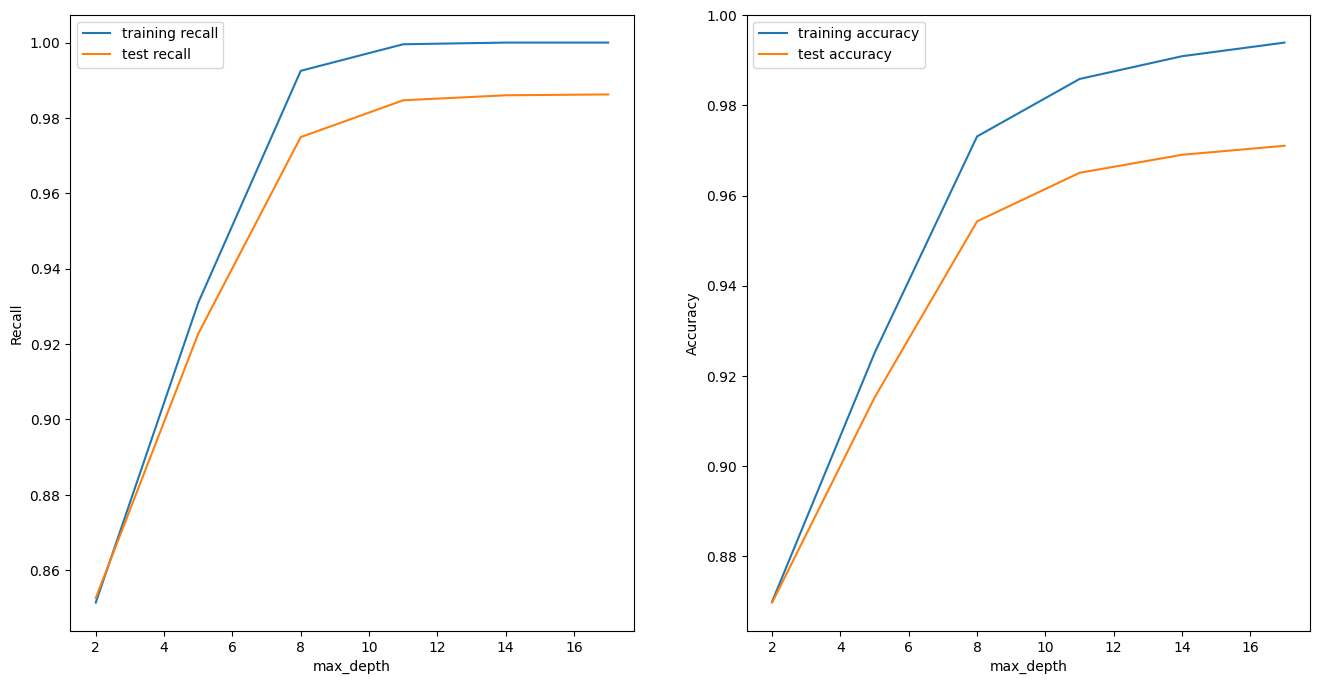

In [ ]:
plotDTAccuracyRecall(scores,"max_depth")

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

Tuning max features

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"max_features": [4,8,14,20,24]}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 8, 14, 20, 24]}, refit='recall',
             return_train_score=True, scoring=['recall', 'accuracy'])

In [ ]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_max_features', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

,param_max_features,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,4,1.00,0.99,1.00,0.98
1,8,1.00,0.98,1.00,0.97
2,14,1.00,0.98,1.00,0.97
3,20,1.00,0.98,1.00,0.97
4,24,1.00,0.98,1.00,0.97


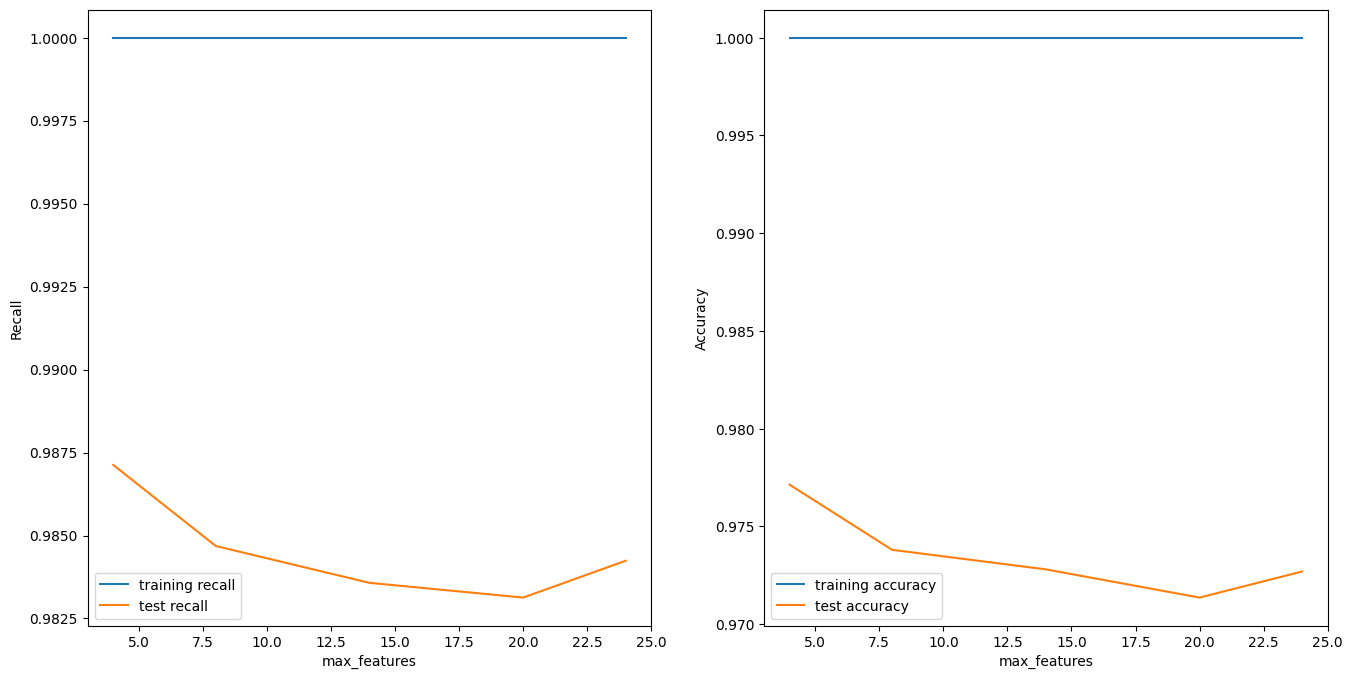

In [ ]:
plotDTAccuracyRecall(scores,"max_features")

Tuning min_samples leaf

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"min_samples_leaf": range(100,400,50)}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'])

In [ ]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_min_samples_leaf', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

,param_min_samples_leaf,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,100,0.91,0.89,0.91,0.90
1,150,0.89,0.88,0.90,0.89
2,200,0.88,0.87,0.89,0.88
3,250,0.87,0.86,0.88,0.88
4,300,0.86,0.85,0.88,0.87
5,350,0.85,0.85,0.88,0.87


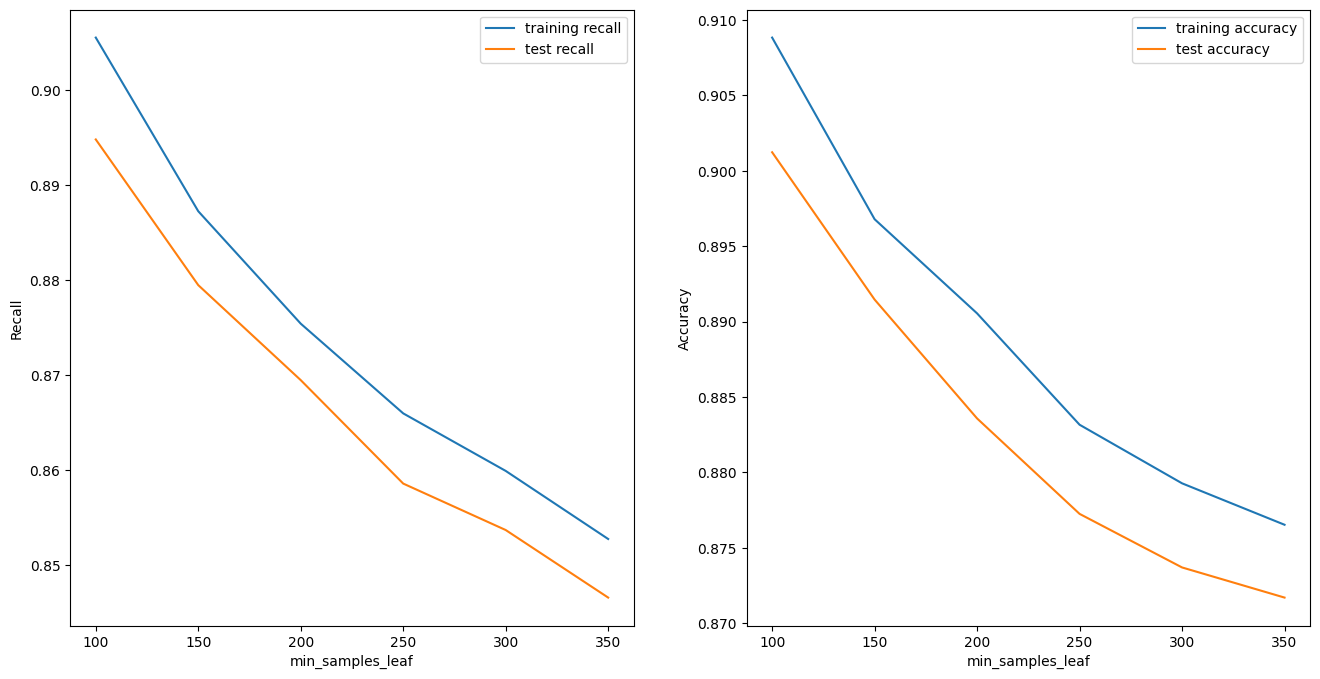

In [ ]:
plotDTAccuracyRecall(scores,"min_samples_leaf")

Tuning min_samples split

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"min_samples_split": range(200,500,50)}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'])

In [ ]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_min_samples_split', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

,param_min_samples_split,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,200,0.92,0.91,0.94,0.92
1,250,0.91,0.90,0.93,0.91
2,300,0.90,0.89,0.92,0.91
3,350,0.89,0.89,0.92,0.91
4,400,0.90,0.89,0.92,0.90
5,450,0.88,0.88,0.91,0.90


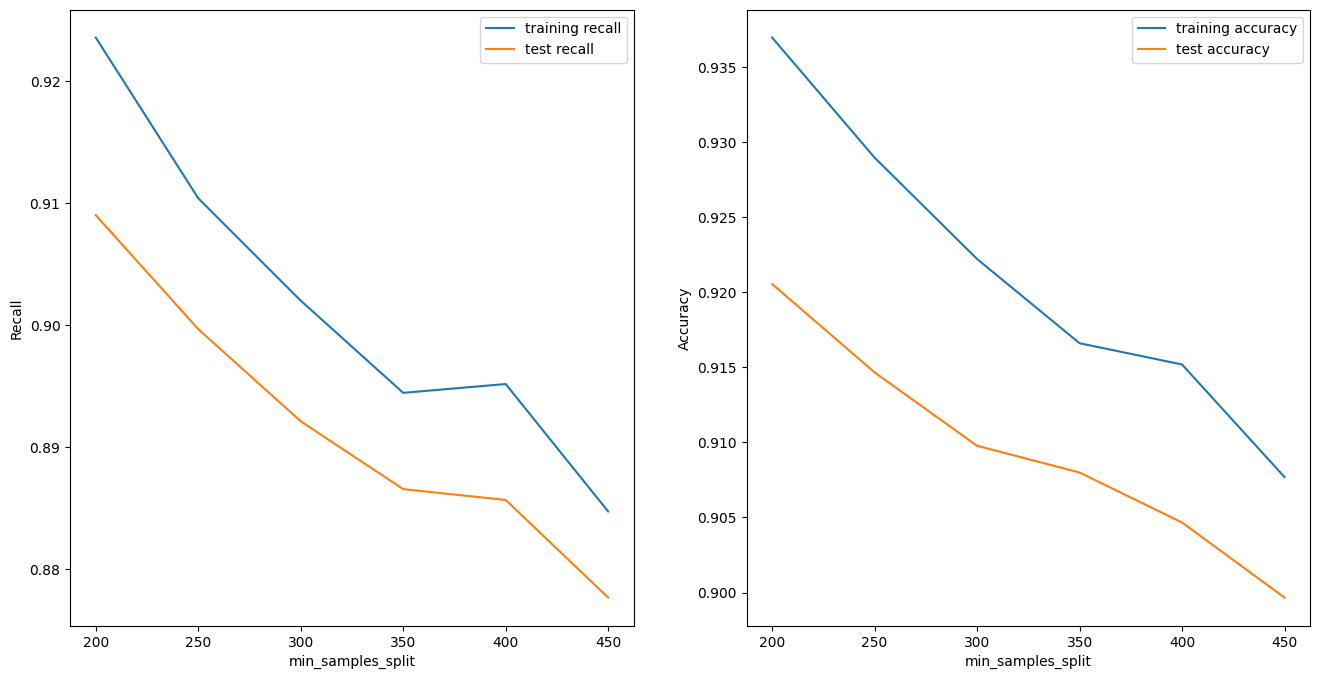

In [ ]:
plotDTAccuracyRecall(scores,"min_samples_split")

We can infer that as we reduce the min samples split, both the accuract and recall are reduced

Grid serach to find optimal hyperparameteres

In [156]:
param_grid = {
    "max_depth" : [4,8,10],
    "min_samples_leaf": range(100, 400, 200),
    "min_samples_split": range(200, 500, 100),
    "n_estimators": [100,200],
    "max_features": [5,10,15]
}

rf_1 = RandomForestClassifier()

grid_search_1 = GridSearchCV(estimator = rf_1, param_grid = param_grid,  cv=3, n_jobs= -1, verbose= 1,
                             scoring=["recall","accuracy"], refit="recall", return_train_score=True)
grid_search_1.fit(X_tr,y_tr)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10, 15],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200]},
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'], verbose=1)

In [157]:
rf_best_params = {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}
print('We can get recall of',grid_search_1.best_score_,'using',grid_search_1.best_params_)
rf_best_params = grid_search_1.best_params_

We can get recall of 0.8947835634358866 using {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


Since hyperparameter tuning is takinglot of time to run, we are commenting it out.

Output of hyperparameter tuning: We can get recall of ~0.8925012478509234 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}

In [158]:
#Taking all the best estimators except max_depth=10 because it might overfit the decision trees
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=rf_best_params['min_samples_leaf'],
                             min_samples_split=rf_best_params['min_samples_split'],
                             max_features=rf_best_params['max_features'],
                             n_estimators=rf_best_params['n_estimators'])

rfc_final.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_leaf=100,
                       min_samples_split=200)

In [159]:
predictions = rfc_final.predict(X_test)
predictions_train = rfc_final.predict(X_tr)

In [160]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy of test data:", accuracy_score(y_test,predictions))
print("Recall of test data:", recall_score(y_test,predictions))


print(classification_report(y_tr,predictions_train))
print(confusion_matrix(y_tr,predictions_train))
print("Accuracy of train data:", accuracy_score(y_tr,predictions_train))
print("Recall of train data:", recall_score(y_tr,predictions_train))


              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1926
           1       0.33      0.68      0.44       117

    accuracy                           0.90      2043
   macro avg       0.65      0.80      0.69      2043
weighted avg       0.94      0.90      0.92      2043

[[1762  164]
 [  38   79]]
Accuracy of test data: 0.9011257953989231
Recall of test data: 0.6752136752136753
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4505
           1       0.90      0.90      0.90      4505

    accuracy                           0.90      9010
   macro avg       0.90      0.90      0.90      9010
weighted avg       0.90      0.90      0.90      9010

[[4074  431]
 [ 441 4064]]
Accuracy of train data: 0.9032186459489456
Recall of train data: 0.9021087680355161


We are getting good results from random forest with accuracy of 88% and recall of approximately 73%

Get important features

In [161]:
#list first 15 important features in descending order
indices = np.argsort(rfc.feature_importances_)[::-1]

for f in range(0,15):
    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], rfc.feature_importances_[indices[f]]))

 1) roam_og_mou_8                  0.102000
 2) roam_ic_mou_8                  0.086991
 3) total_ic_mou_8                 0.041087
 4) roam_ic_mou_7                  0.030804
 5) loc_ic_t2m_mou_8               0.026419
 6) arpu_8                         0.024785
 7) loc_ic_mou_8                   0.023398
 8) total_rech_data_amt_8          0.023054
 9) loc_og_mou_8                   0.022791
10) roam_og_mou_7                  0.022566
11) total_rech_amt_8               0.022406
12) last_day_rch_amt_8             0.019346
13) max_rech_amt_8                 0.018003
14) max_rech_data_8                0.014659
15) loc_og_t2m_mou_8               0.013764


<Axes: >

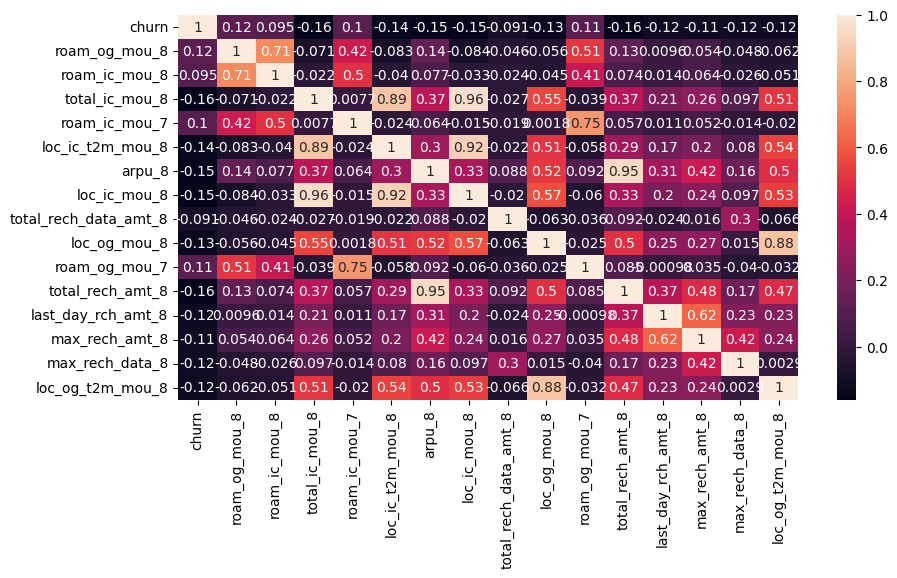

In [162]:
plt.subplots(figsize=(10,5))
columns =  [X_train.columns[indices[f]] for f in range(0,15)]
columns.insert(0, 'churn')

data=filtered_data[columns]
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

As seen in above heatmap:
- Few features have positive correlation with Churn which means that with increase in thesefeatures, churn rate increases. Example-roam_og_mou_8, roam_ic_mou_8, drop_in_arpu_8,drop_in_mou_8
- Few features have negative correlation with churn rate. Example-total_ic_mou_8, last_day_rch_amt_8, loc_ic_mou_8, total_rech_amt_8, etc.
- These features do not have very high correlation so combination of these impact churn.

Let's plot some of these features and see how they impact churn.

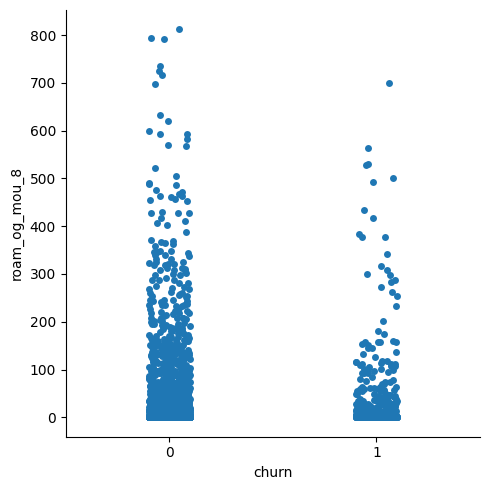

In [163]:
sns.catplot(x="churn",y="roam_og_mou_8",data= filtered_data)

If roaming out minutes of usage is less than ~400 then there are high chances of churning

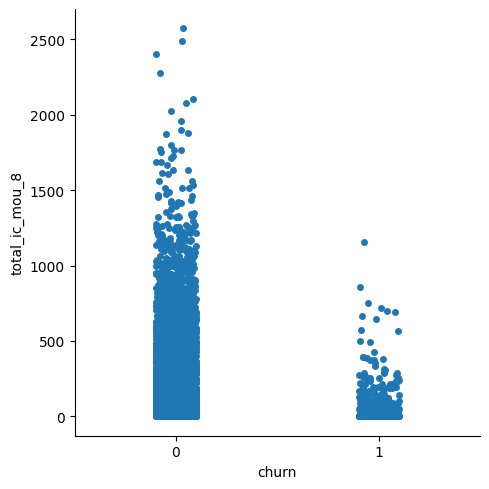

In [164]:
sns.catplot(x="churn",y="total_ic_mou_8",data= filtered_data)

As seen from the graph that if the total incoming minutes of usage is less than 500 then there are high chances of customer to churn

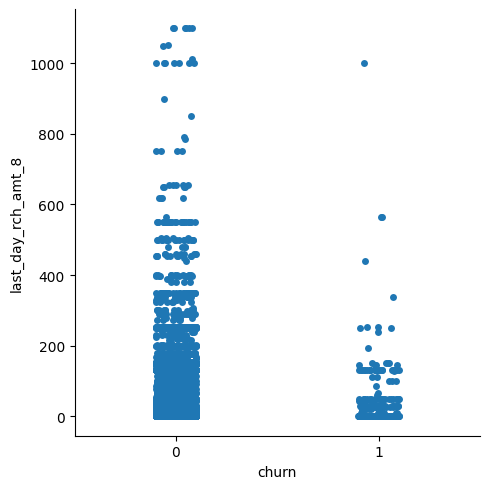

In [165]:
sns.catplot(x="churn", y="last_day_rch_amt_8", data=filtered_data)

As seen from the plot that last day recharge amount for the 8th month is less than 225

<Axes: xlabel='churn', ylabel='loc_ic_mou_8'>

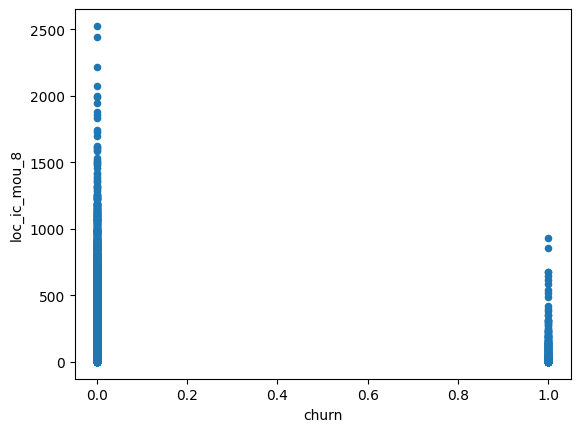

In [166]:
filtered_data.plot.scatter(y='loc_ic_mou_8',x='churn')

As seen from the diagram the local incoming minutes of usage

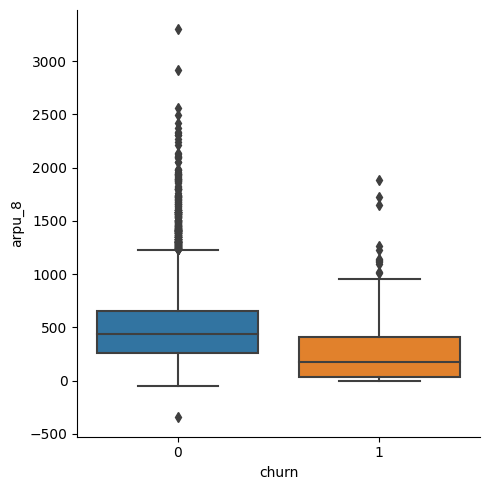

In [167]:
sns.catplot(x="churn", y="arpu_8", kind='box', data=filtered_data);

#CONCLUSION

Our objective was to build two models
1. in which one was to predict if the high values customer will churn or nowt
2. other was to identify important variables that are stropn predictors of churn.

#1. Predict if the high value customers will churn or not
1. We had 130+ columns and 14945 rows in the dataset at the start after performing the data cleaning and manipulation
2. After that we handled class imabalance using SMOTE technique and had 136 columns in the dataset
3. We ran our first logistic regression and got an accuracy and recall of 85% and 87% approximately on train set
4. The same logistic regression was not satisfying the test data as it had accuracy and recall of about 81% and 71%.
A5. s we had a lot of features so we used PCA on the data which reduced the features to 58 explaining 96% of variance.
6. Moving further we applied Logistic Regression on the data undergone PCA and were driven by an accuracy of 80% and recall of 78% on test data
7. Moreover, we performed hyperparameter tuning using Grid searchCV which resulted in an accuracy of 80% and recall of 79%
8. Then we tried another hyperparameter in Logistic Regression-class_weight. So instead of using SMOTE, we performed PCA and selected features explaing 97% variance(~69 principle components).
9. Performed hyper parameter tuning of C and class weight using GridSearchCV and built a model with 72% accuracy and 84% recall.
10. Since we want to correctly predit Churned customers, we selected model with higher recall and compromised a little on accuracy. So our final prediction model is Logistic regression with custom class_weight hyperparameter .

#2. Model for identifying features driving Churn

1. First we build the Decision tree with max_depth=5 and other parameters and default, we got an accuracy of 80% and recall of 60%
2. We performed hyperparameter tuning using Grid Search CV and obtained a best score of 90% with an accuracy of 86%
3. Random forest model was used to train the data and hyperparameter tuning of max_depth, min_samples leaf, min_samples_split and max_feature gave us a recall of approximately 89% and accuracy of 88%.
4. This model was used to predict the best features that were strong predictors of churning of the customers
5. The driving features are:

•	roam_ic_mou_8
•	roam_og_mou_8
•	loc_ic_mou_8
•	loc_ic_t2m_mou_8
•	drop_in_arpu_8
•	max_rech_amt_8
•	total_ic_mou_8
•	roam_og_mou_7
•	week_of_last_rech_8
•	arpu_8













#Recommend strategies to handle Churn
1. Identify customers likely to churn using above parameters then give them offers/discounts to retain them.
2. Service provider should check recent complaints from these customers and see if they are facing any particular issues and assure them the resolution along with some benefits.
3. Service provider can also make feedback calls to get the customer feedback and decide strategy to retain them.
4. Based on the customer data and call usage and recharge history, provide them offers in that recharge segments.
5. Provide customized budget roaming packs if customers frequently uses roaming services.